In [1]:
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
from matplotlib import cm
import networkx as nx
import powerlaw
import pandas as pd

In [2]:
from matplotlib import font_manager, rc
# 한글 폰트가 깨지지 않기 위한 세팅
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
file_lst = ['0306','0709','10','11_phy','12_phy_cm','12_phy_eqm']

# 함수 정의

In [4]:
def entire_Graph():
    G = nx.Graph()
    
    for file_name in file_lst:
        f = open(f"All_{file_name}.txt", 'r', encoding='UTF-8')
        for line in f:
            data_line = list(set(line.split()))

            # 노드 i 추가
            for i in data_line:
                if G.has_node(i):
                    G.nodes[i]['frequency'] += 1
                else:
                    G.add_node(i, frequency=1)
            # 엣지 ij 추가
            for idx, i in enumerate(data_line):
                for jdx, j in enumerate(data_line):
                    if idx >= jdx:
                        continue
                    if G.has_edge(i, j):
                        G[i][j]['weight'] += 1
                    else:
                        G.add_edge(i, j, weight=1)
        # 노드 weight 추가
        f = open(f"All_{file_name}.txt", 'r', encoding='UTF-8')
        for line in f:
            data_line = list(set(line.split()))
            for i in data_line:
                sum_weight = sum(data['weight'] for u, v, data in G.edges(i, data=True))
                G.nodes[i]['weight'] = sum_weight
    return G

In [5]:
def subject_graph(N, file_name, fig_name):
    G = nx.Graph()

    f = open(f"All_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
    # 노드 i 추가
        for i in data_line:
            if G.has_node(i):
                G.nodes[i]['frequency'] += 1
            else:
                G.add_node(i, frequency=1)
    # 엣지 ij 추가
        for idx, i in enumerate(data_line):
                for jdx, j in enumerate(data_line):
                    if idx >= jdx:
                        continue
                    if G.has_edge(i, j):
                        G[i][j]['weight'] += 1
                    else:
                        G.add_edge(i, j, weight=1)
    # 노드 weight 추가
    f = open(f"All_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
        for i in data_line:
            sum_weight = sum(data['weight'] for u, v, data in G.edges(i, data=True))
            G.nodes[i]['weight'] = sum_weight
                    
    # 노드와 엣지의 가중치를 저장할 딕셔너리 초기화
    node_weights = {node: data['weight'] for node, data in G.nodes(data=True)}
    edge_weights = {(u, v): data['weight'] for u, v, data in G.edges(data=True)}

    # 노드의 크기 및 엣지의 굵기를 가중치에 비례하여 설정
    #node_size = [node_weights[node] * 20 for node in G.nodes()]
    edge_width = [edge_weights[edge] * 0.1 for edge in G.edges()]
    
    # 노드 색상 매핑을 위한 컬러맵 설정
    cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
    norm = plt.Normalize(min(node_weights.values()), max(node_weights.values()))  # 노드 가중치에 따라 정규화

    # 노드 색상 설정
    node_colors = [cmap(norm(node_weights[node])) for node in G.nodes()]

    # 그래프 그리기
    pos = nx.spring_layout(G)  # 그래프의 노드 위치 결정
    plt.figure(figsize=(6,4), dpi=300)
    plt.title(fig_name, fontsize=15)
    nx.draw(G, pos, with_labels=True,
            node_color=node_colors, node_size = 100, width=edge_width,
            font_family = font, font_size=3)
    
    # 컬러바
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, label='Node strength')
    
    plt.show()

In [6]:
def graph(N, file_name):
    G = nx.Graph()

    f = open(f"All_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
    # 노드 i 추가
        for i in data_line:
            if G.has_node(i):
                G.nodes[i]['frequency'] += 1
            else:
                G.add_node(i, frequency=1)
    # 엣지 ij 추가
        for idx, i in enumerate(data_line):
                for jdx, j in enumerate(data_line):
                    if idx >= jdx:
                        continue
                    if G.has_edge(i, j):
                        G[i][j]['weight'] += 1
                    else:
                        G.add_edge(i, j, weight=1)
    # 노드 weight 추가
    f = open(f"All_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
        for i in data_line:
            sum_weight = sum(data['weight'] for u, v, data in G.edges(i, data=True))
            G.nodes[i]['weight'] = sum_weight
    
    return G

In [7]:
def basic_info(G):
    
    hist_wordFreq = []
    hist_edges = []
    hist_nodeWeight = []
    hist_edgeWeight = []

    for i in list(G.nodes):
        hist_edges.append(G.degree[i])
        hist_wordFreq.append(G.nodes[i]['frequency'])
        hist_nodeWeight.append(G.nodes[i]['weight'])

    for edge in list(G.edges):
        i, j = edge[0], edge[1]
        hist_edgeWeight.append(G[i][j]['weight'])

    print(f'Number of nodes: {G.number_of_nodes()}')
    print(f'Number of edges: {G.number_of_edges()}')
    
    print(f'WordFreq avg: {round(np.average(hist_wordFreq), 2)}, WordFreq std: {round(np.std(hist_wordFreq), 2)}')
    print(f'Degree avg: {round(np.average(hist_edges), 2)}, Degree std: {round(np.std(hist_edges), 2)}')
    print(f'NodeWeight avg: {round(np.average(hist_nodeWeight), 2)}, NodeWeight std: {round(np.std(hist_nodeWeight), 2)}')
    print(f'EdgeWeight avg: {round(np.average(hist_edgeWeight), 2)}, EdgeWeight std: {round(np.std(hist_edgeWeight), 2)}')
    
    return hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight

In [8]:
def hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight):

    plt.figure(figsize=(13,4), dpi=300)
    
    plt.subplot(1,3,1)
    plt.title('Dist. of node degree')
    plt.hist(hist_edges)
    plt.yscale('log')
    plt.xlabel('Node degree')
    
    plt.subplot(1,3,2)
    plt.title('Dist. of edge weight')
    plt.hist(hist_edgeWeight)
    plt.yscale('log')
    plt.xlabel('Edge weight')

    plt.subplot(1,3,3)
    plt.title('Dist. of node strength')
    plt.hist(hist_nodeWeight)
    plt.yscale('log')
    plt.xlabel('Node strength')

In [9]:
def power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight):
    
    compare_lst = ['exponential', 'truncated_power_law', 'lognormal']
    
    plt.figure(figsize=(13,4), dpi=300)

    plt.subplot(1,4,1)
    plt.title('Dist. of word frequency')
    fit = powerlaw.Fit(hist_wordFreq)
    fig1 = fit.plot_ccdf(color = 'b')
    fit.power_law.plot_ccdf(color = 'r', linestyle = '--', ax=fig1)
    plt.ylabel('Probability')
    check = [1,1,1]
    for i, compare in enumerate(compare_lst):
        R, p = fit.distribution_compare('power_law',compare, normalized_ratio = True)
        if p < 0.05:
            check[i] = 0
    if sum(check) == 3:
        print(f"1: Pass, {fit.power_law.alpha}\n")
    
    plt.subplot(1,4,2)
    plt.title('Dist. of degree')
    fit = powerlaw.Fit(hist_edges)
    fig1 = fit.plot_ccdf(color = 'b')
    fit.power_law.plot_ccdf(color = 'r', linestyle = '--', ax=fig1)
    check = [1,1,1]
    for i, compare in enumerate(compare_lst):
        R, p = fit.distribution_compare('power_law',compare, normalized_ratio = True)
        if p < 0.05:
            check[i] = 0
    if sum(check) == 3:
        print(f"2: Pass, {fit.power_law.alpha}\n")

    plt.subplot(1,4,3)
    plt.title('Dist. of node strength')
    fit = powerlaw.Fit(hist_nodeWeight)
    fig2 = fit.plot_ccdf(color = 'b')
    fit.power_law.plot_ccdf(color = 'r', linestyle = '--', ax=fig2)
    check = [1,1,1]
    for i, compare in enumerate(compare_lst):
        R, p = fit.distribution_compare('power_law',compare, normalized_ratio = True)
        if p < 0.05:
            check[i] = 0
    if sum(check) == 3: print(f"3: Pass, {fit.power_law.alpha}\n")

    plt.subplot(1,4,4)
    plt.title('Dist. of edge weight')
    fit = powerlaw.Fit(hist_edgeWeight)
    fig3 = fit.plot_ccdf(color = 'b')
    fit.power_law.plot_ccdf(color = 'r', linestyle = '--', ax=fig3)
    check = [1,1,1]
    for i, compare in enumerate(compare_lst):
        R, p = fit.distribution_compare('power_law',compare, normalized_ratio = True)
        if p < 0.05:
            check[i] = 0
    if sum(check) == 3: print(f"4: Pass, {fit.power_law.alpha}\n")

In [10]:
def info(G):
    node_freq = {node: G.nodes[node]['frequency'] for node in G.nodes()}

    node_degree = dict(G.degree())

    # 각 노드의 강도(weight) 계산
    node_strength = dict(nx.degree(G, weight='weight'))

    # 각 엣지의 가중치(weight) 계산
    edge_weight = dict(nx.get_edge_attributes(G, 'weight'))

    # betweenness centrality 계산
    betweenness_centrality = nx.current_flow_betweenness_centrality(G, weight='weight')

    # 결과 출력
    data = sorted(node_freq.items(), key=lambda x: x[1], reverse=True)
    df1 = pd.DataFrame(data, columns=['Node_F','Node Frequency'])

    #print("Node Degree:")
    data = sorted(node_degree.items(), key=lambda x: x[1], reverse=True)
    df2 = pd.DataFrame(data, columns=['Node_ND','Node Degree'])

    #print("\nNode Strength:")
    data = sorted(node_strength.items(), key=lambda x: x[1], reverse=True)
    df3 = pd.DataFrame(data, columns=['Node_NS', 'Node Strength'])

    #print("\nEdge Weight:")
    data = sorted(edge_weight.items(), key=lambda x: x[1], reverse=True)
    df4 = pd.DataFrame(data, columns=['Edge', 'Edge Weight'])

    #print("\nBetweenness Centrality:")
    data = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    df5 = pd.DataFrame(data, columns=['Node_BC', 'Betweenness Centrality'])

    df = pd.concat([df1,df2,df3,df4,df5],axis=1)
    
    return df

# 키워드 추출

In [11]:
result = pd.DataFrame()
for idx in range(7):
    if idx == 0:
        G = entire_Graph()
        file = 'Total'
    else:
        G = graph(3, file_lst[idx-1])
        file = file_lst[idx-1]
    node_freq = {node: G.nodes[node]['frequency'] for node in G.nodes()}
    data = sorted(node_freq.items(), key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(data, columns=['Node_F',file])
    result = pd.concat([result, df], axis=1)

print('Node Frequency')
result.head(10)

Node Frequency


Node_F  Total Node_F  0306 Node_F  0709 Node_F   10  Node_F  11_phy Node_F  \
0     설명     49     이용  16.0     설명  12.0     다양  6.0      설명     9.0     설명   
1     이용     38     물체  12.0     물체   8.0     지구  5.0      다양     4.0     이해   
2   일상생활     27     관찰  10.0     이용   7.0     기술  4.0      적용     4.0     이용   
3     물체     26   일상생활  10.0   일상생활   7.0   일상생활  4.0       예     4.0     다양   
4     다양     24     조사   9.0     운동   7.0     측정  3.0      원리     4.0      예   
5      예     22     성질   8.0     물질   6.0     자연  3.0      활용     4.0     물체   
6     이해     22     설명   8.0     표현   6.0     설명  3.0       빛     4.0     활용   
7     활용     21     현상   6.0     이해   6.0     의미  3.0  역학적에너지     3.0     운동   
8     조사     19     비교   6.0     특징   5.0     활용  3.0      전환     3.0      열   
9     물질     15     기체   5.0     관계   5.0     구성  3.0     에너지     3.0    정량적   

   12_phy_cm Node_F  12_phy_eqm  
0       10.0     설명         7.0  
1        9.0     기술         7.0  
2        7.0     활용         6.0  
3        5.0      빛         4.0  
4        5.0     원리         4.0  
5        4.0     조사         4.0  
6        4.0     추리         3.0  
7        3.0      예         3.0  
8        3.0     이용         3.0  
9        2.0     이해         3.0

In [14]:
result1 = pd.DataFrame()
for idx in range(7):
    if idx == 0:
        G = entire_Graph()
        file = 'Total'
    else:
        G = graph(3, file_lst[idx-1])
        file = file_lst[idx-1]
    node_strength = dict(nx.degree(G, weight='weight'))
    data = sorted(node_strength.items(), key=lambda x: x[1], reverse=True)
    df3 = pd.DataFrame(data, columns=['Node_NS', file])
    result1 = pd.concat([result1, df3], axis=1)

print('Node Strength')
result1.head(10)

Node Strength


Node_NS  Total Node_NS   0306 Node_NS   0709 Node_NS    10 Node_NS  11_phy  \
0      설명    379      이용  100.0      설명  102.0      다양  65.0      설명    75.0   
1      이용    309    일상생활   73.0    일상생활   71.0      기술  52.0       빛    40.0   
2    일상생활    247      조사   65.0      이용   69.0      지구  52.0      활용    39.0   
3      다양    234      관찰   64.0      이해   61.0    일상생활  43.0      원리    37.0   
4      이해    222      물체   64.0      물체   61.0      활용  42.0      다양    35.0   
5      활용    214      설명   45.0      표현   56.0      측정  38.0      적용    33.0   
6       예    185      성질   43.0      특징   49.0      자연  37.0       예    30.0   
7      물체    171      방법   39.0      다양   46.0      의미  35.0      이용    30.0   
8      조사    171      현상   38.0      운동   46.0      과정  35.0     에너지    26.0   
9      기술    150       예   34.0      물질   45.0      구성  33.0      기술    25.0   

  Node_NS  12_phy_cm Node_NS  12_phy_eqm  
0      설명       88.0      기술        61.0  
1      이해       85.0      활용        53.0  
2      이용       62.0       빛        44.0  
3       예       52.0      설명        42.0  
4      다양       49.0      원리        38.0  
5      활용       49.0      조사        38.0  
6      물체       29.0      인식        37.0  
7      조사       26.0     디지털        33.0  
8       열       26.0      확률        32.0  
9      운동       25.0      이해        31.0

In [15]:
result2 = pd.DataFrame()
for idx in range(7):
    if idx == 0:
        G = entire_Graph()
        file = 'Total'
    else:
        G = graph(3, file_lst[idx-1])
        file = file_lst[idx-1]
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    H = G.subgraph(largest_component)
    betweenness_centrality = nx.current_flow_betweenness_centrality(H, weight='weight')
    data = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    df5 = pd.DataFrame(data, columns=['Node_BC', file])
    result2 = pd.concat([result2, df5], axis=1)

print('Betweenness Centrality')
result2.head(10)

Betweenness Centrality


Node_BC     Total Node_BC      0306 Node_BC      0709 Node_BC        10  \
0      설명  0.157062      이용  0.217404      설명  0.203593      다양  0.178566   
1      이용  0.117353      물체  0.185977    일상생활  0.137948      적용  0.174896   
2      이해  0.097690      관찰  0.180783      물체  0.131425      지구  0.170978   
3    일상생활  0.086937    일상생활  0.140524      이용  0.127234      기술  0.139082   
4      다양  0.084668      조사  0.131860      운동  0.124501    일상생활  0.135013   
5      활용  0.077696      설명  0.123765      이해  0.117064      과정  0.109882   
6      물체  0.070829      비교  0.109377      표현  0.109710      의미  0.106438   
7       예  0.063079      성질  0.092532      물질  0.098252      활용  0.094342   
8      조사  0.060435      현상  0.082280      관계  0.092026      자연  0.090540   
9      원리  0.056064      방법  0.080676      과정  0.083015      설명  0.085448   

  Node_BC    11_phy Node_BC  12_phy_cm Node_BC  12_phy_eqm  
0      설명  0.355189      설명   0.319073      기술    0.202466  
1      적용  0.175339      이해   0.316466      설명    0.190485  
2      다양  0.175326      이용   0.194349      이용    0.164825  
3      논증  0.143430      다양   0.162439       빛    0.157158  
4      원리  0.141487       예   0.152214      활용    0.153970  
5       예  0.139287      활용   0.148446      추리    0.149024  
6       빛  0.121124       열   0.088626      원리    0.146557  
7      활용  0.107025      물체   0.071094      확률    0.133925  
8      전환  0.093537      운동   0.066415      인식    0.111917  
9     에너지  0.090565    일상생활   0.060420      조사    0.095564

# 전체 용어 및 커뮤니티

In [22]:
G = entire_Graph()

C:\Users\user\AppData\Local\Temp\ipykernel_37072\4052051241.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_37072\4052051241.py:27: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


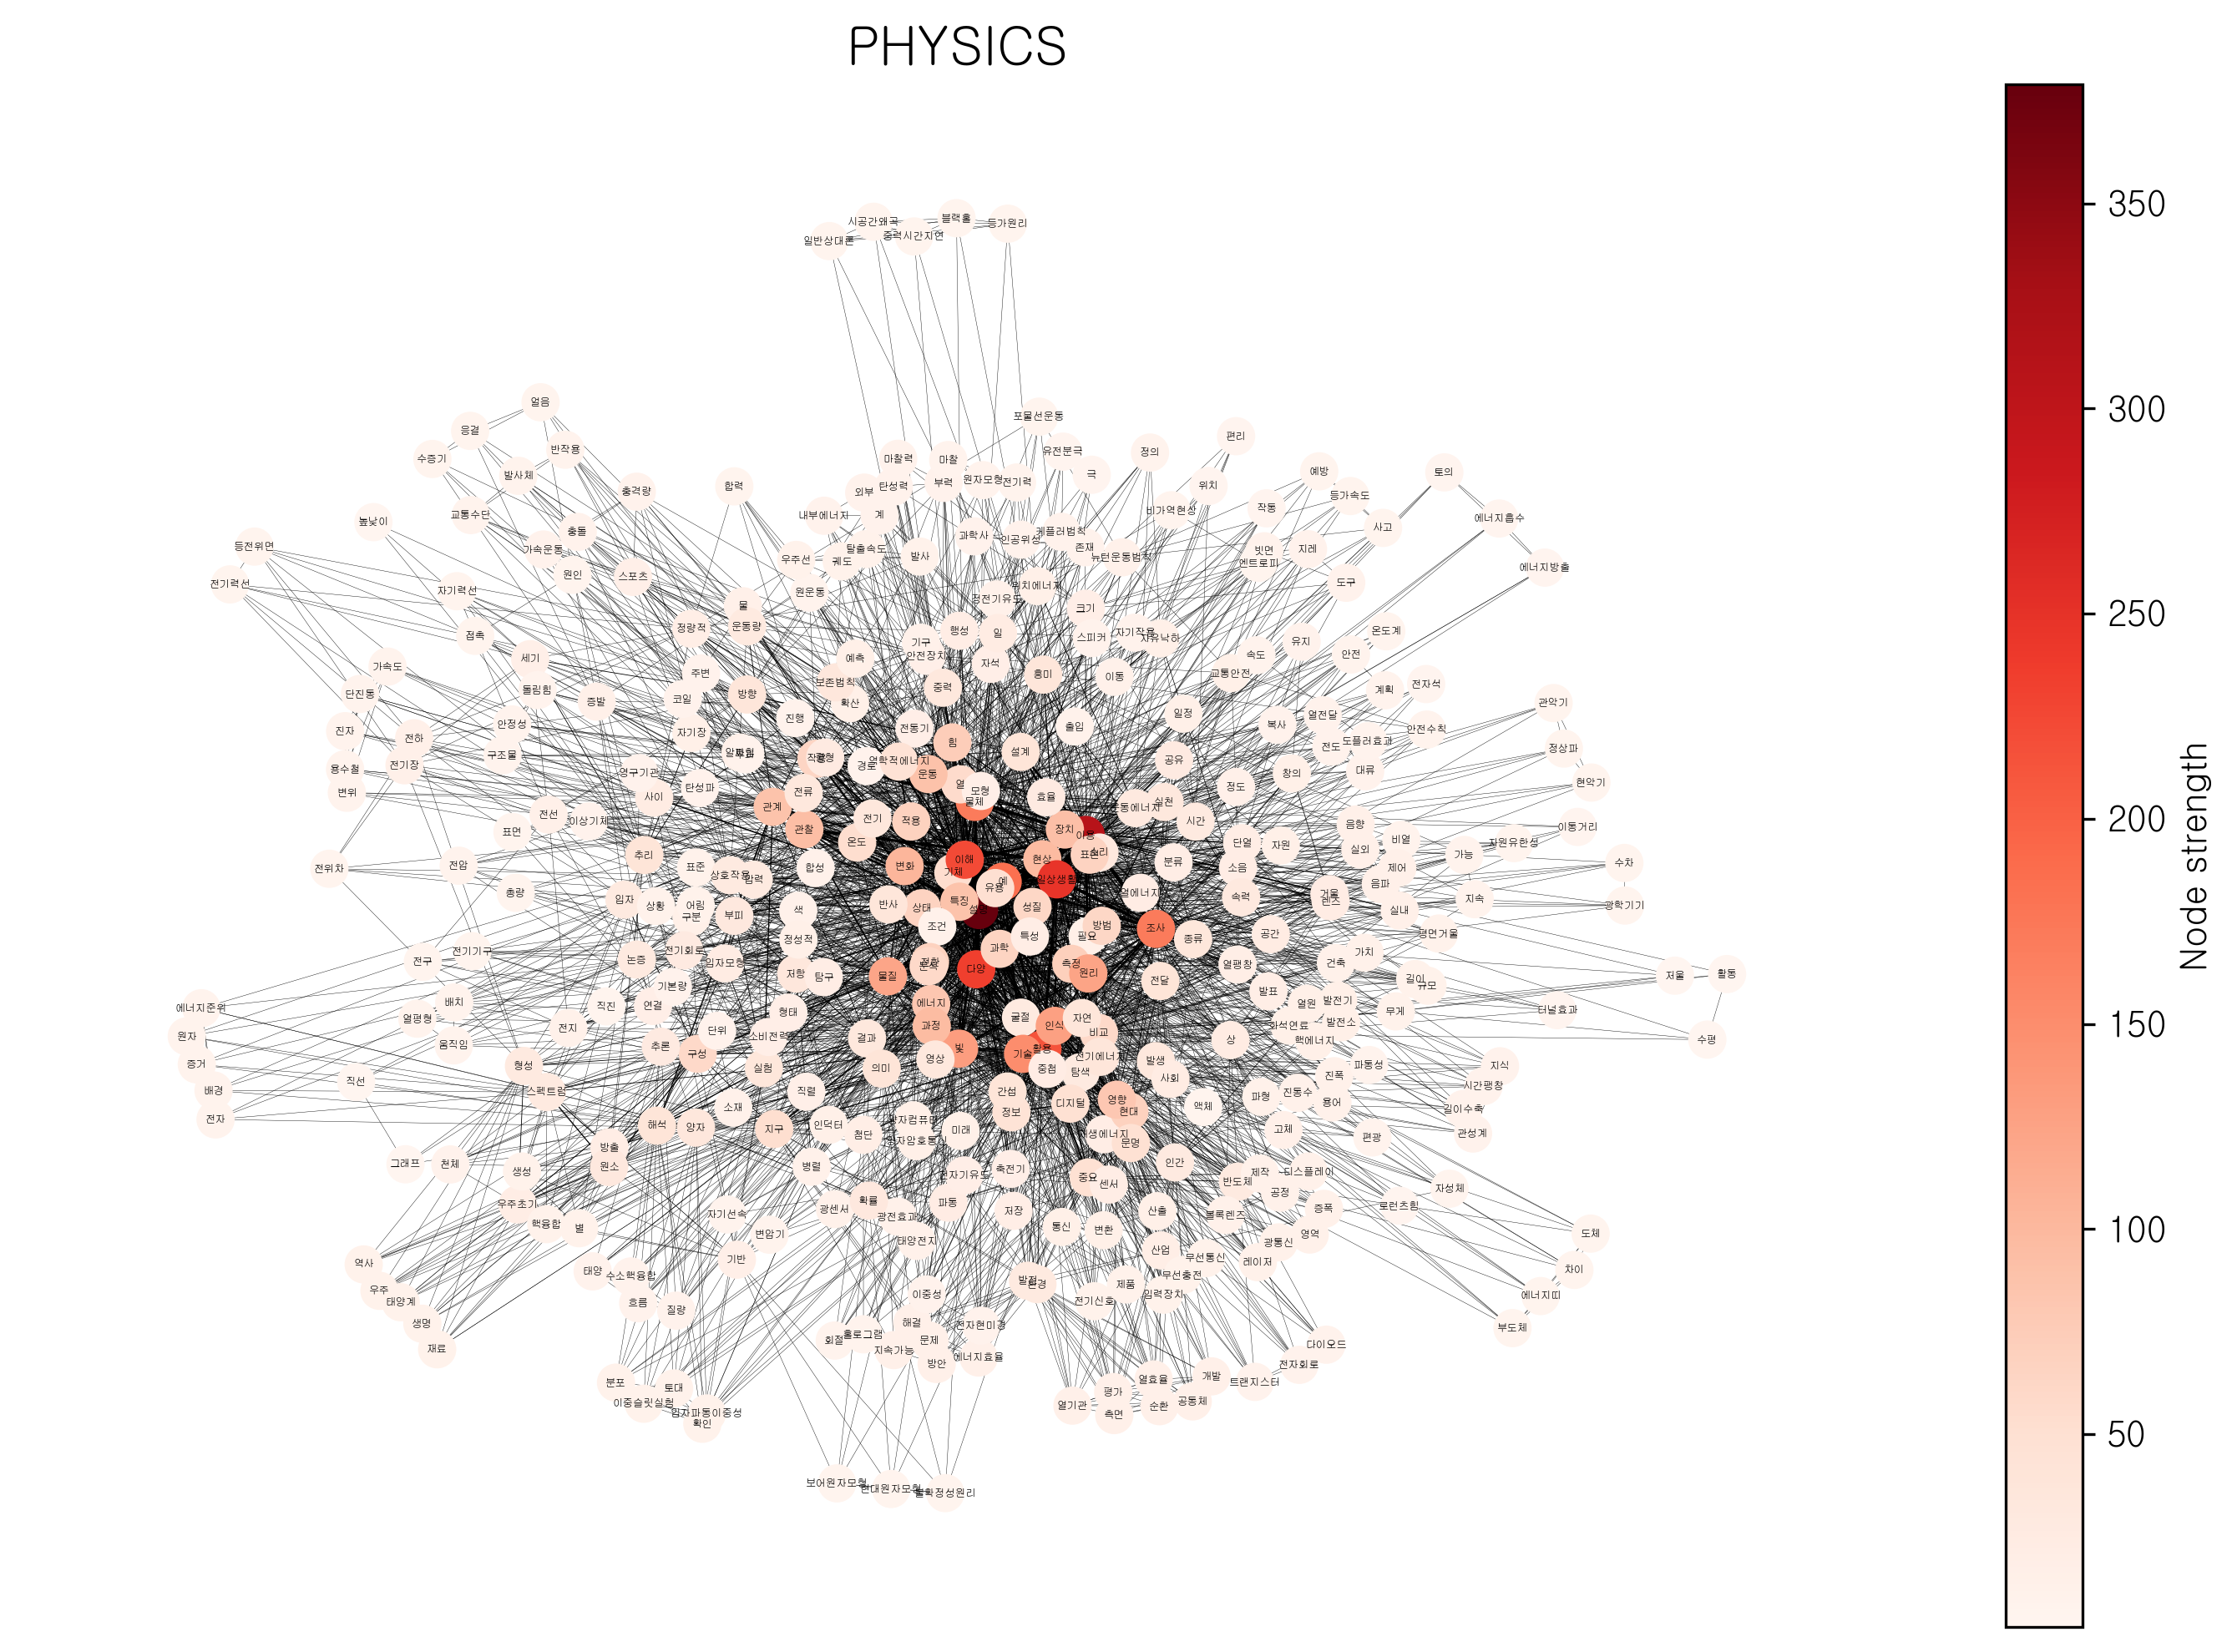

In [23]:
# 노드와 엣지의 가중치를 저장할 딕셔너리 초기화
node_weights = {node: data['weight'] for node, data in G.nodes(data=True)}
edge_weights = {(u, v): data['weight'] for u, v, data in G.edges(data=True)}

# 노드의 크기 및 엣지의 굵기를 가중치에 비례하여 설정
#node_size = [node_weights[node] * 0.1 for node in G.nodes()]
edge_width = [edge_weights[edge] * 0.1 for edge in G.edges()]

# 노드 색상 매핑을 위한 컬러맵 설정
cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
norm = plt.Normalize(min(node_weights.values()), max(node_weights.values()))  # 노드 가중치에 따라 정규화

# 노드 색상 설정
node_colors = [cmap(norm(node_weights[node])) for node in G.nodes()]

# 그래프 그리기
pos = nx.spring_layout(G)  # 그래프의 노드 위치 결정
plt.figure(figsize=(12,8), dpi=300)
plt.title('PHYSICS', fontsize=15)
nx.draw(G, pos, with_labels=True,
        node_color=node_colors, node_size=100, width=edge_width,
        font_family = font, font_size=3)

# 컬러바
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Node strength')

plt.show()

In [29]:
hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight = basic_info(G)

Number of nodes: 389
Number of edges: 3931
WordFreq avg: 2.92, WordFreq std: 4.77
Degree avg: 20.21, Degree std: 23.73
NodeWeight avg: 25.72, NodeWeight std: 40.47
EdgeWeight avg: 1.27, EdgeWeight std: 0.89


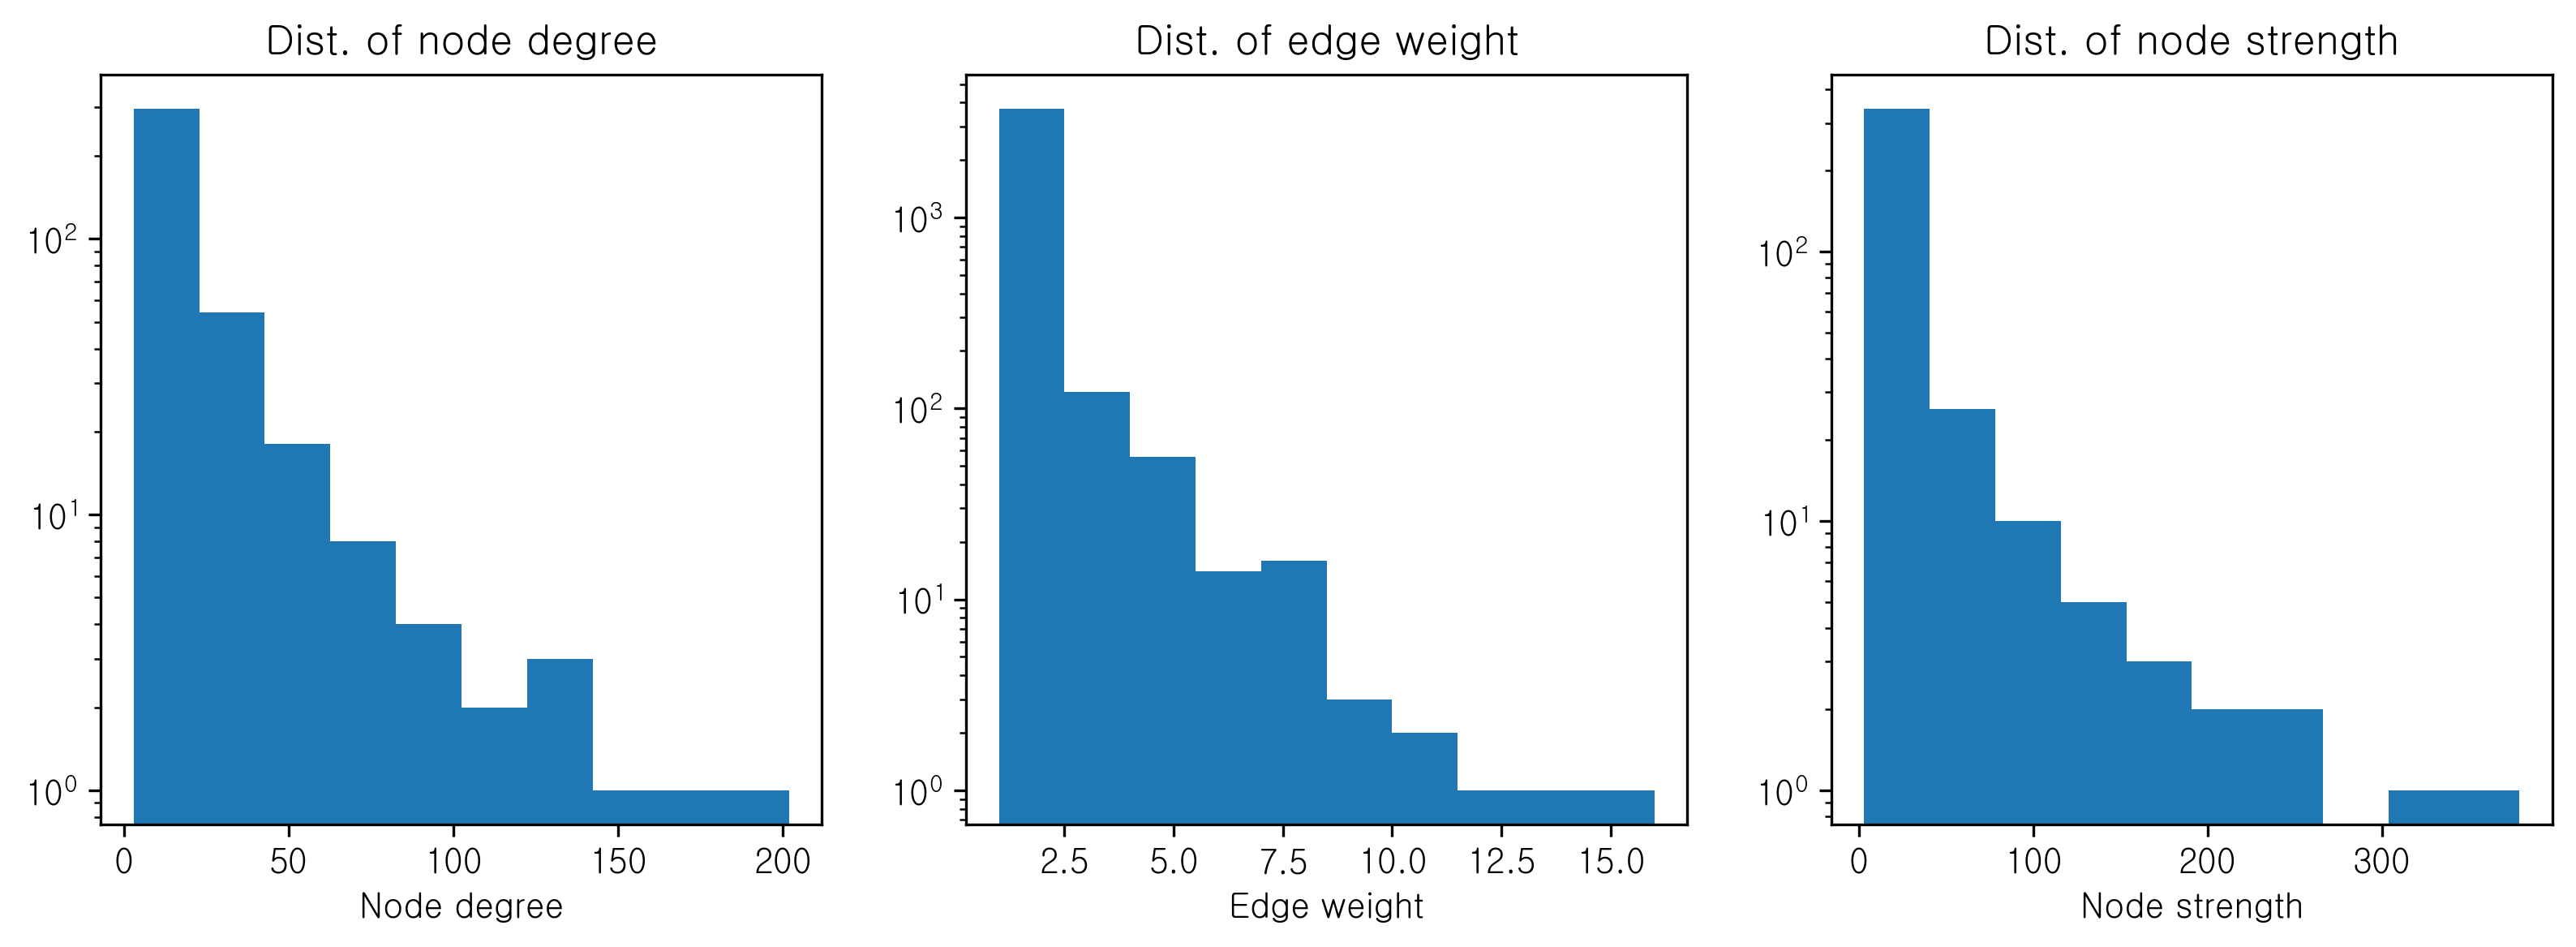

In [34]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

Calculating best minimal value for power law fit


Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
Assuming nested distributions


Calculating best minimal value for power law fit
2: Pass, 2.6497048990159278

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
4: Pass, 7.712095487996254



Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


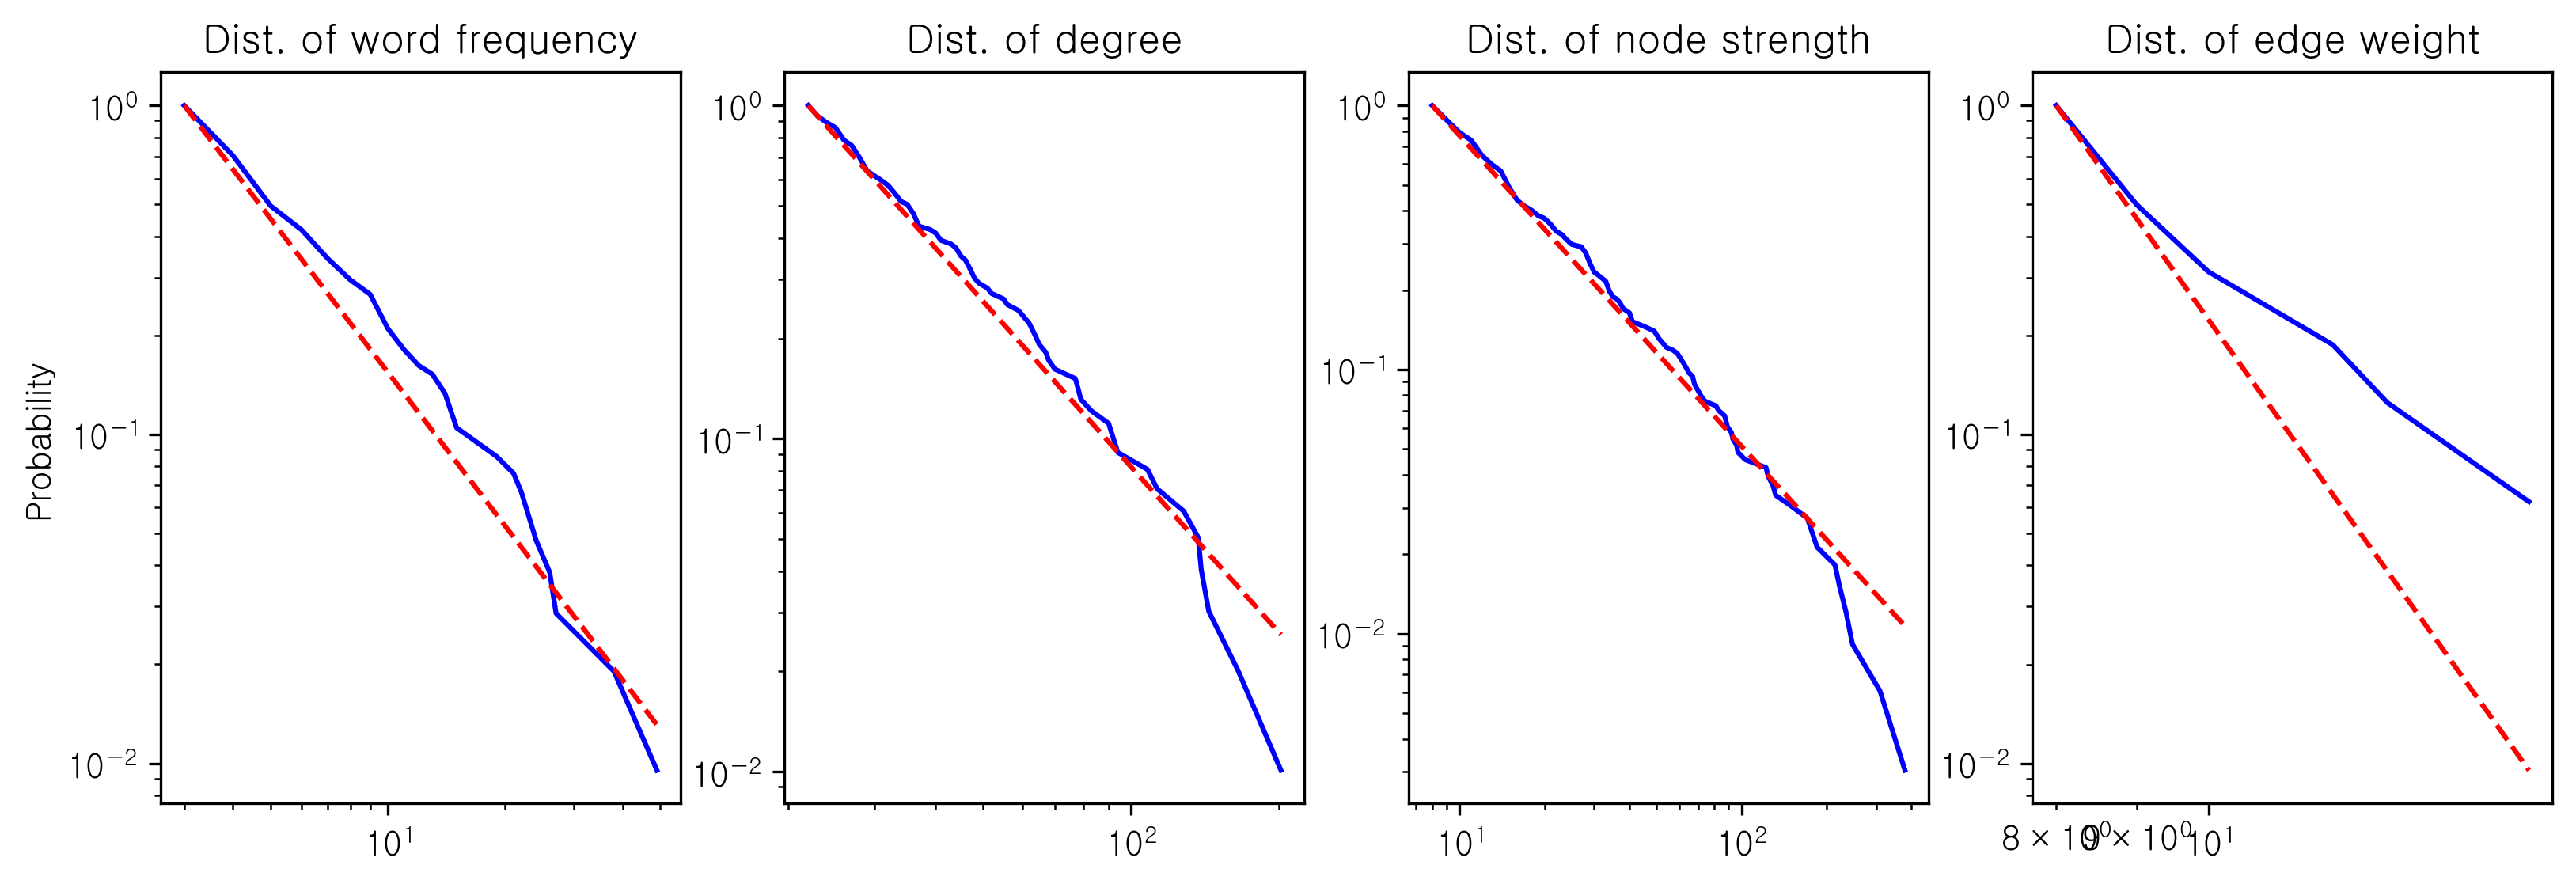

In [35]:
power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

In [36]:
df = info(G)
df.head(10)

Node_F  Node Frequency Node_ND  Node Degree Node_NS  Node Strength  \
0     설명            49.0      설명        202.0      설명          379.0   
1     이용            38.0      이용        165.0      이용          309.0   
2   일상생활            27.0    일상생활        144.0    일상생활          247.0   
3     물체            26.0      이해        139.0      다양          234.0   
4     다양            24.0      다양        137.0      이해          222.0   
5      예            22.0      활용        128.0      활용          214.0   
6     이해            22.0       예        113.0       예          185.0   
7     활용            21.0      조사        108.0      물체          171.0   
8     조사            19.0      물체         94.0      조사          171.0   
9     물질            15.0      원리         90.0      기술          150.0   

         Edge  Edge Weight Node_BC  Betweenness Centrality  
0    (이용, 설명)           16      설명                0.157062  
1  (일상생활, 이용)           13      이용                0.117353  
2    (다양, 설명)           12      이해                0.097690  
3    (이용, 조사)           10    일상생활                0.086937  
4    (이용, 장치)           10      다양                0.084668  
5    (현상, 설명)            9      활용                0.077696  
6    (물체, 이용)            9      물체                0.070829  
7    (설명, 이해)            9       예                0.063079  
8    (관찰, 현상)            8      조사                0.060435  
9  (일상생활, 조사)            8      원리                0.056064

# 초3-6

C:\Users\user\AppData\Local\Temp\ipykernel_37072\1236278211.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_37072\1236278211.py:56: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


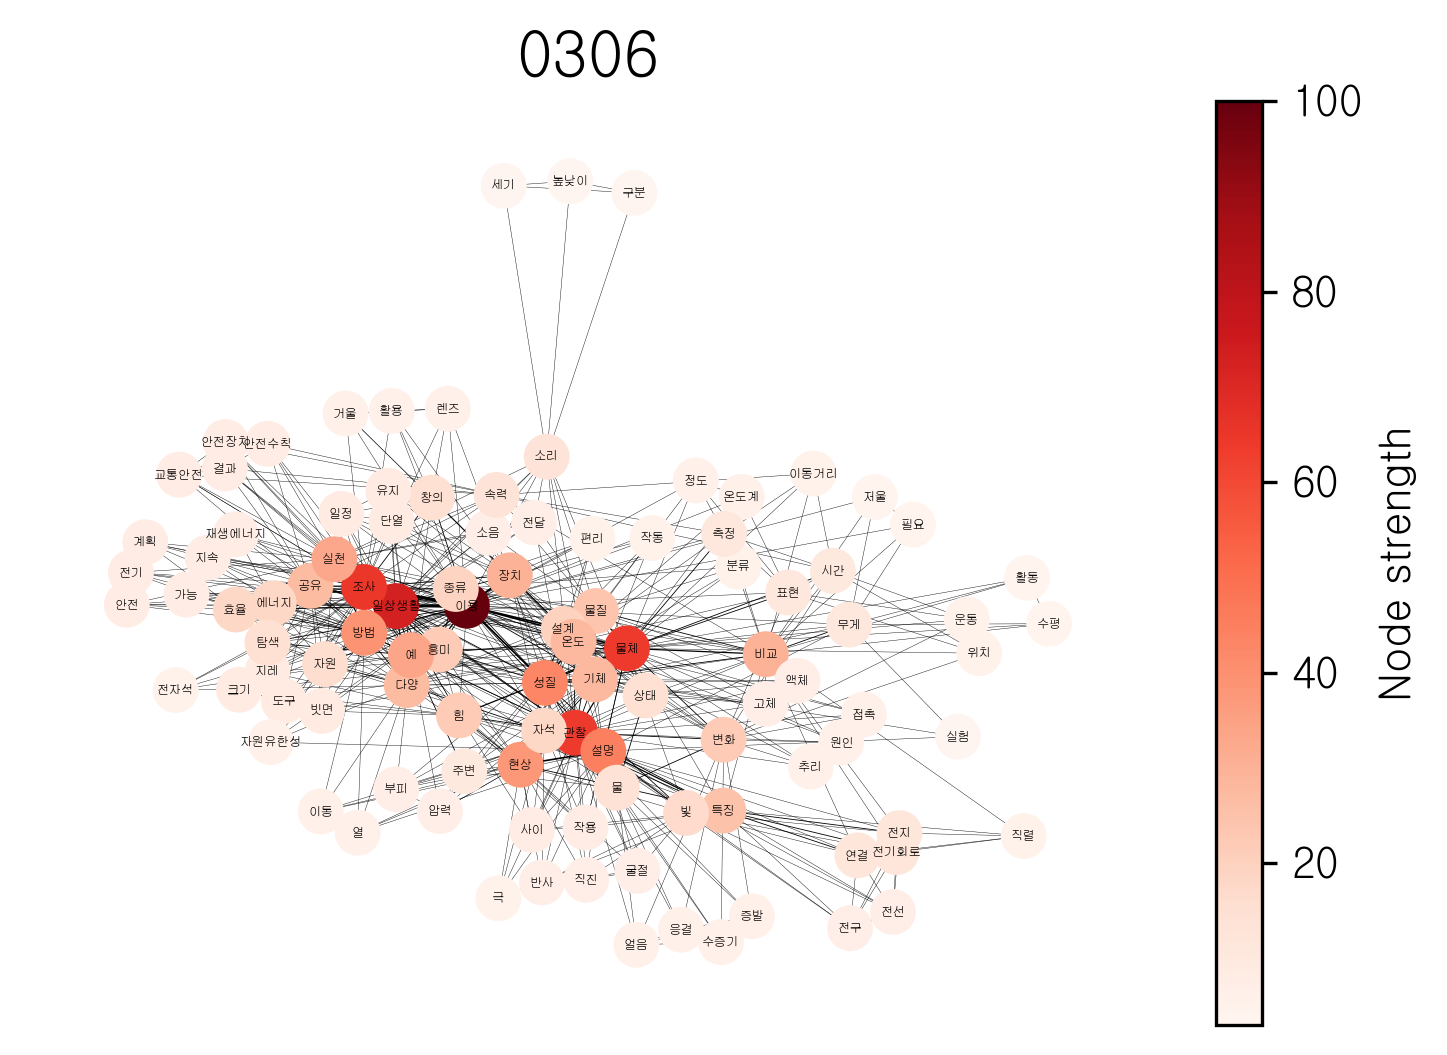

In [37]:
subject_graph(2, file_lst[0], '0306')

In [38]:
G = graph(2, file_lst[0])

In [39]:
hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight = basic_info(G)

Number of nodes: 105
Number of edges: 637
WordFreq avg: 2.4, WordFreq std: 2.58
Degree avg: 12.13, Degree std: 10.06
NodeWeight avg: 15.07, NodeWeight std: 16.24
EdgeWeight avg: 1.24, EdgeWeight std: 0.69


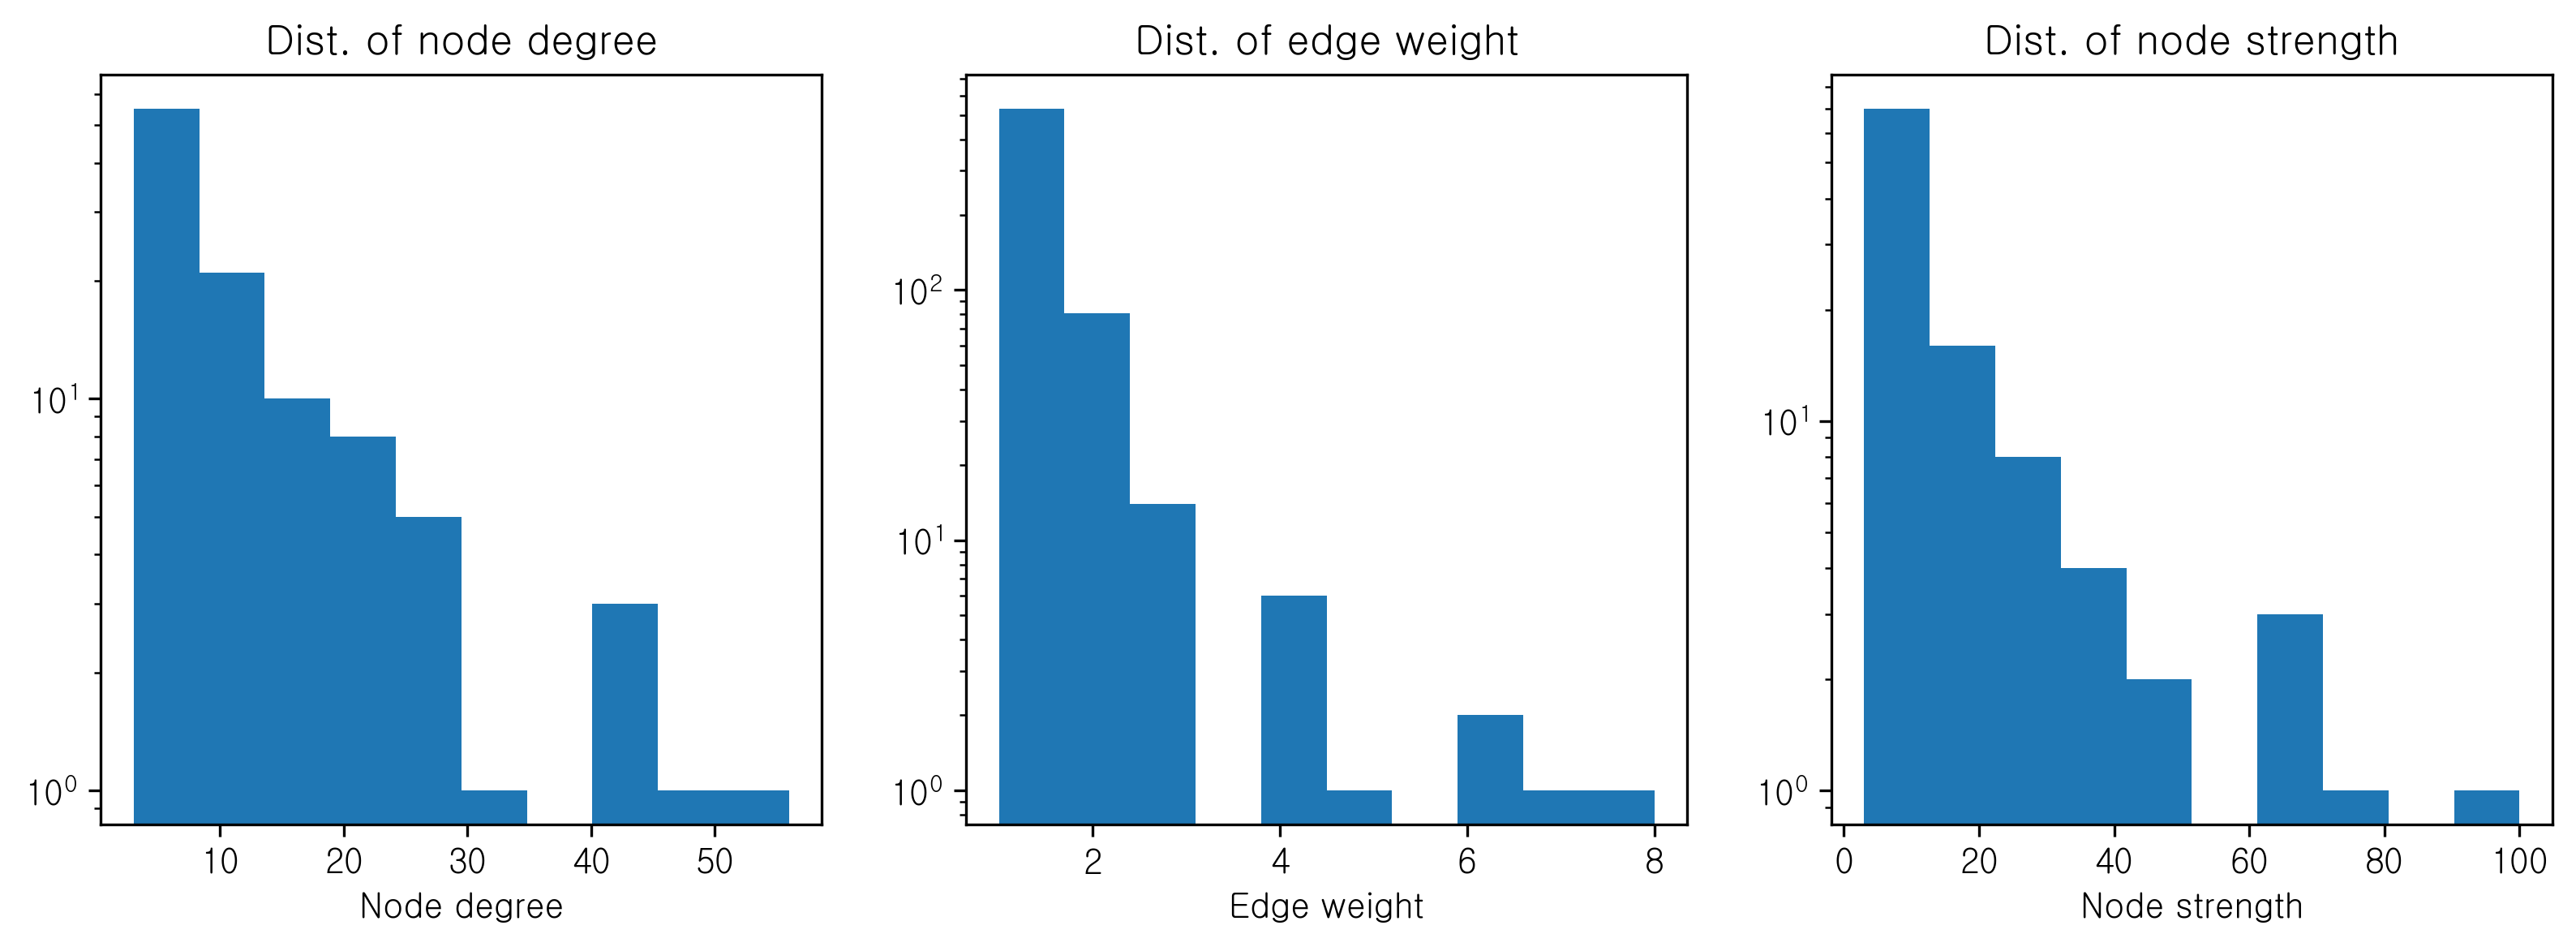

In [40]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

Calculating best minimal value for power law fit
1: Pass, 3.1038545890335403

Calculating best minimal value for power law fit
2: Pass, 2.6028808305369857

Calculating best minimal value for power law fit


Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


Calculating best minimal value for power law fit


Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


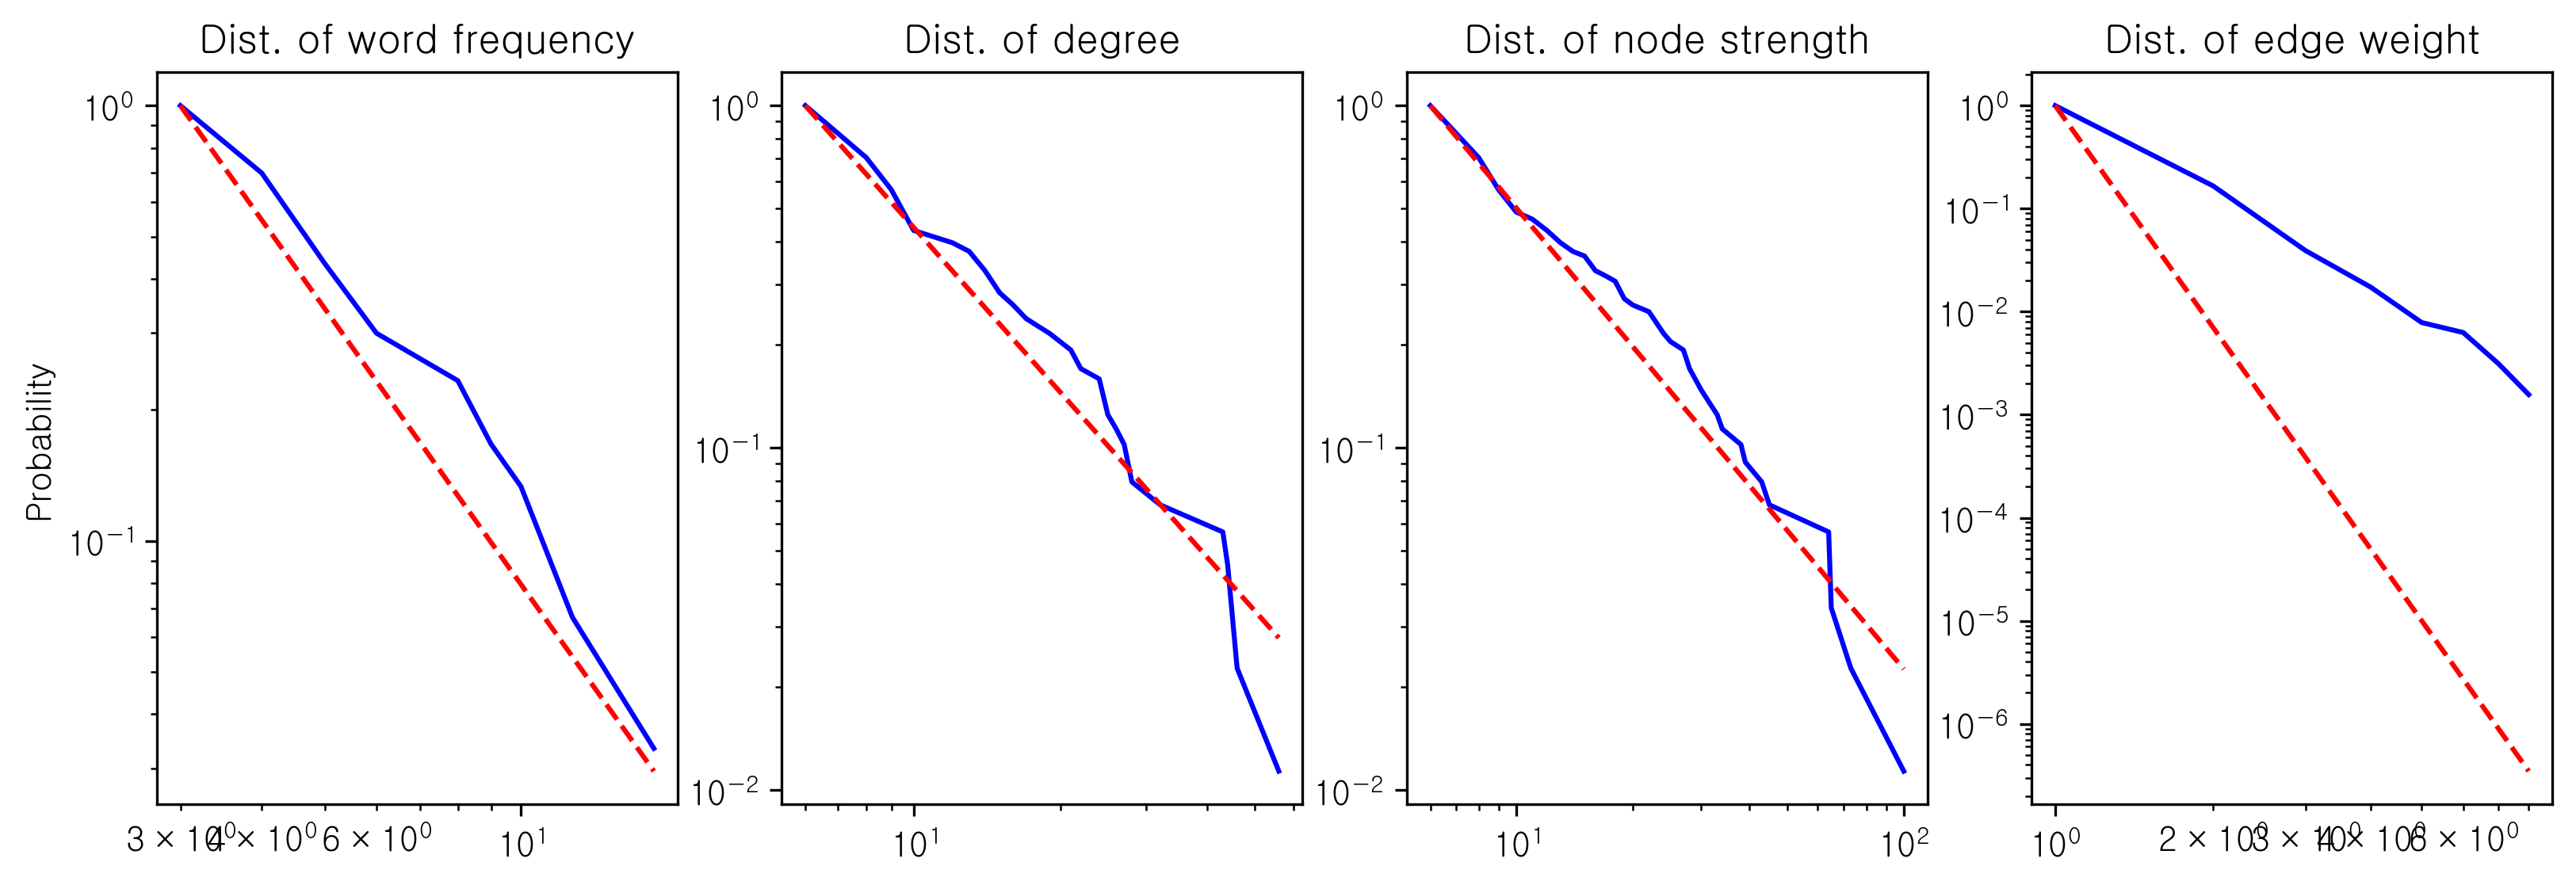

In [41]:
power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

In [42]:
df = info(G)
df.head(20)

Node_F  Node Frequency Node_ND  Node Degree Node_NS  Node Strength  \
0      이용            16.0      이용         56.0      이용          100.0   
1      물체            12.0    일상생활         46.0    일상생활           73.0   
2      관찰            10.0      관찰         44.0      조사           65.0   
3    일상생활            10.0      조사         44.0      관찰           64.0   
4      조사             9.0      물체         43.0      물체           64.0   
5      성질             8.0      설명         32.0      설명           45.0   
6      설명             8.0      방법         28.0      성질           43.0   
7      현상             6.0      성질         27.0      방법           39.0   
8      비교             6.0       예         27.0      현상           38.0   
9      기체             5.0      현상         26.0       예           34.0   
10     방법             5.0      비교         25.0      실천           33.0   
11     장치             5.0      기체         24.0      비교           30.0   
12      예             5.0      실천         24.0      장치           30.0   
13     흥미             4.0      온도         24.0      기체           28.0   
14     물질             4.0      공유         22.0      온도           28.0   
15     설계             4.0      다양         21.0      공유           27.0   
16     다양             4.0      장치         21.0      다양           27.0   
17     실천             4.0      물질         19.0      특징           25.0   
18     특징             4.0      변화         19.0      물질           24.0   
19     변화             4.0       힘         17.0       힘           22.0   

          Edge  Edge Weight Node_BC  Betweenness Centrality  
0     (이용, 조사)            8      이용                0.217404  
1   (일상생활, 이용)            7      물체                0.185977  
2     (관찰, 현상)            6      관찰                0.180783  
3   (일상생활, 조사)            6    일상생활                0.140524  
4     (이용, 장치)            5      조사                0.131860  
5     (관찰, 설명)            4      설명                0.123765  
6     (현상, 설명)            4      비교                0.109377  
7   (일상생활, 실천)            4      성질                0.092532  
8     (물체, 이용)            4      현상                0.082280  
9     (이용, 성질)            4      방법                0.080676  
10    (이용, 설계)            4      변화                0.077649  
11    (관찰, 물체)            3      온도                0.077290  
12     (힘, 물체)            3      소리                0.074272  
13  (일상생활, 공유)            3       예                0.070495  
14  (일상생활, 방법)            3      실천                0.067423  
15    (물체, 비교)            3      장치                0.066295  
16    (물체, 성질)            3      특징                0.065910  
17    (이용, 다양)            3      기체                0.064836  
18     (이용, 예)            3      물질                0.054934  
19    (이용, 방법)            3      공유                0.050951

# 중1-3

C:\Users\user\AppData\Local\Temp\ipykernel_37072\1236278211.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_37072\1236278211.py:56: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


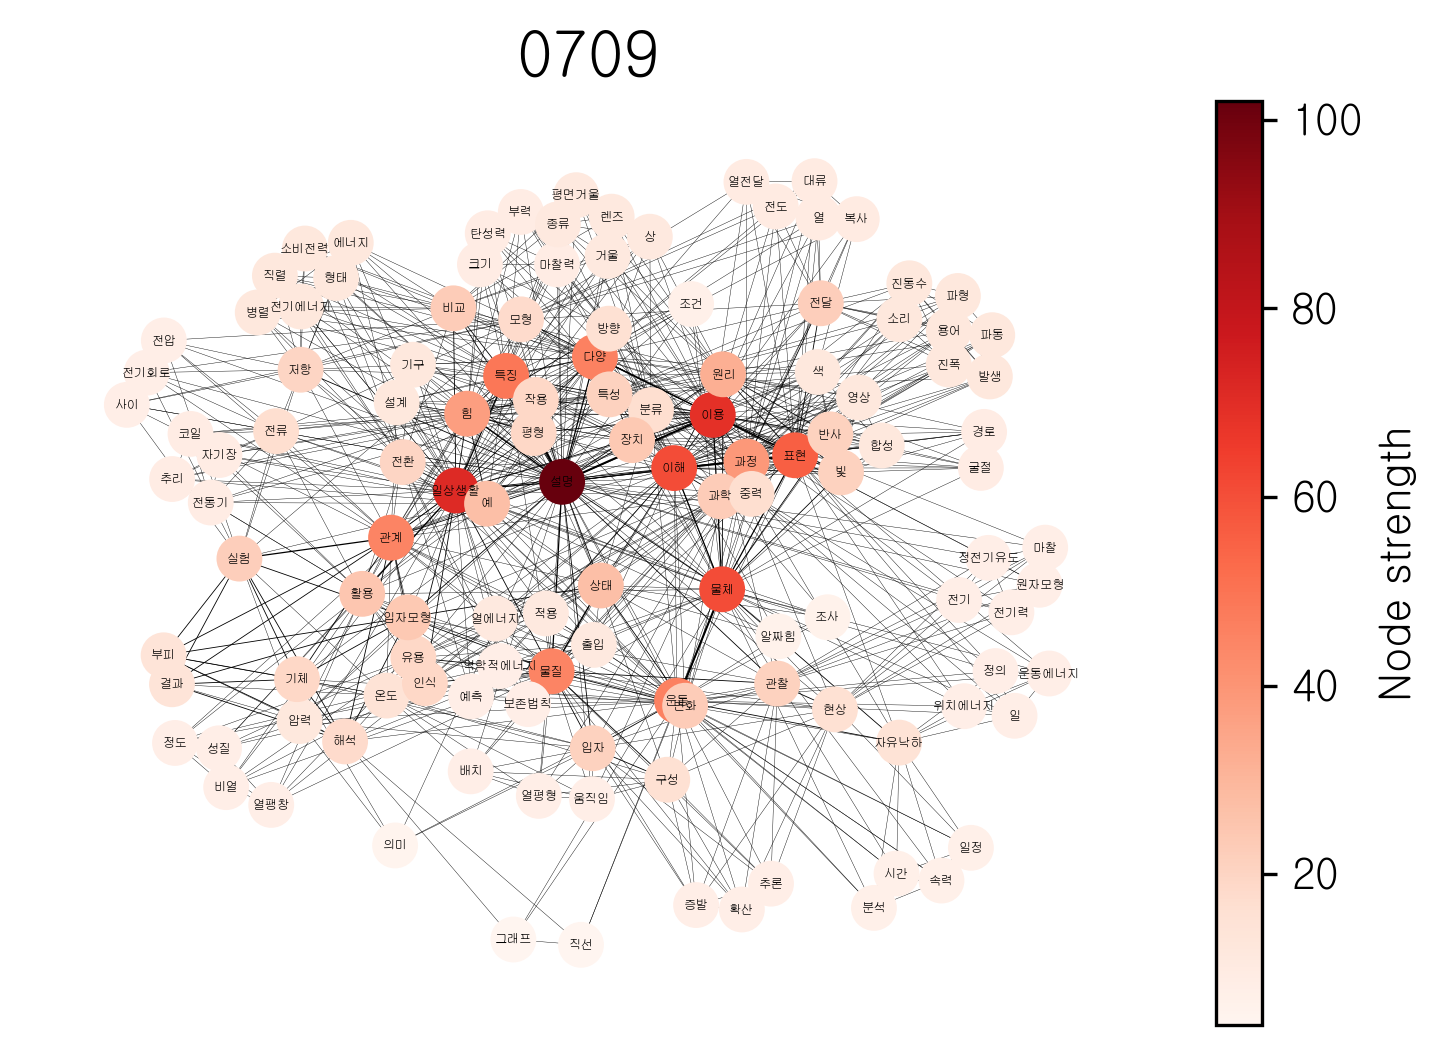

In [43]:
subject_graph(2, file_lst[1], '0709')

In [44]:
G = graph(2, file_lst[1])

In [45]:
hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight = basic_info(G)

Number of nodes: 125
Number of edges: 933
WordFreq avg: 1.94, WordFreq std: 1.75
Degree avg: 14.93, Degree std: 10.98
NodeWeight avg: 17.18, NodeWeight std: 15.28
EdgeWeight avg: 1.15, EdgeWeight std: 0.45


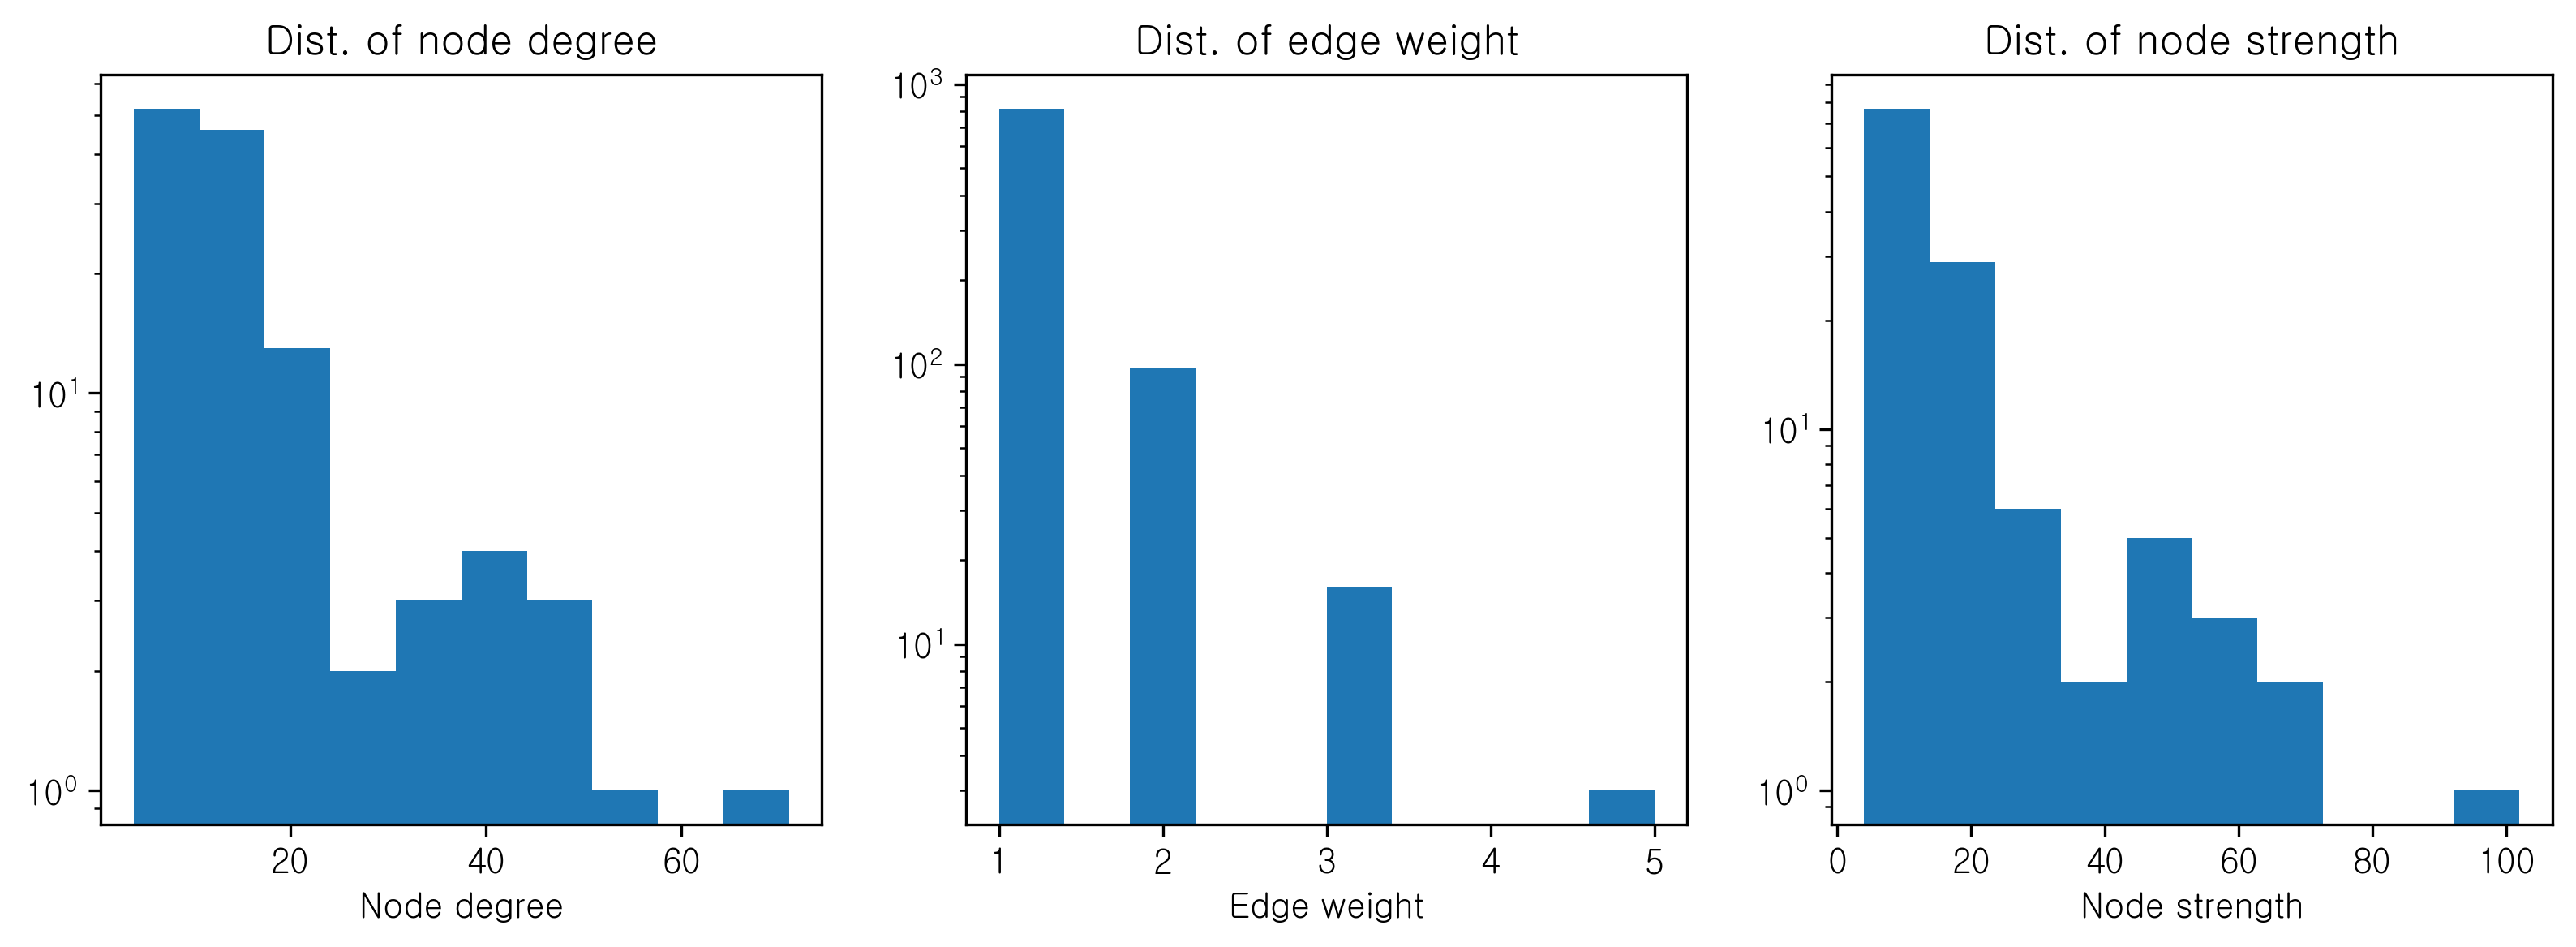

In [46]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
Assuming nested distributions


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


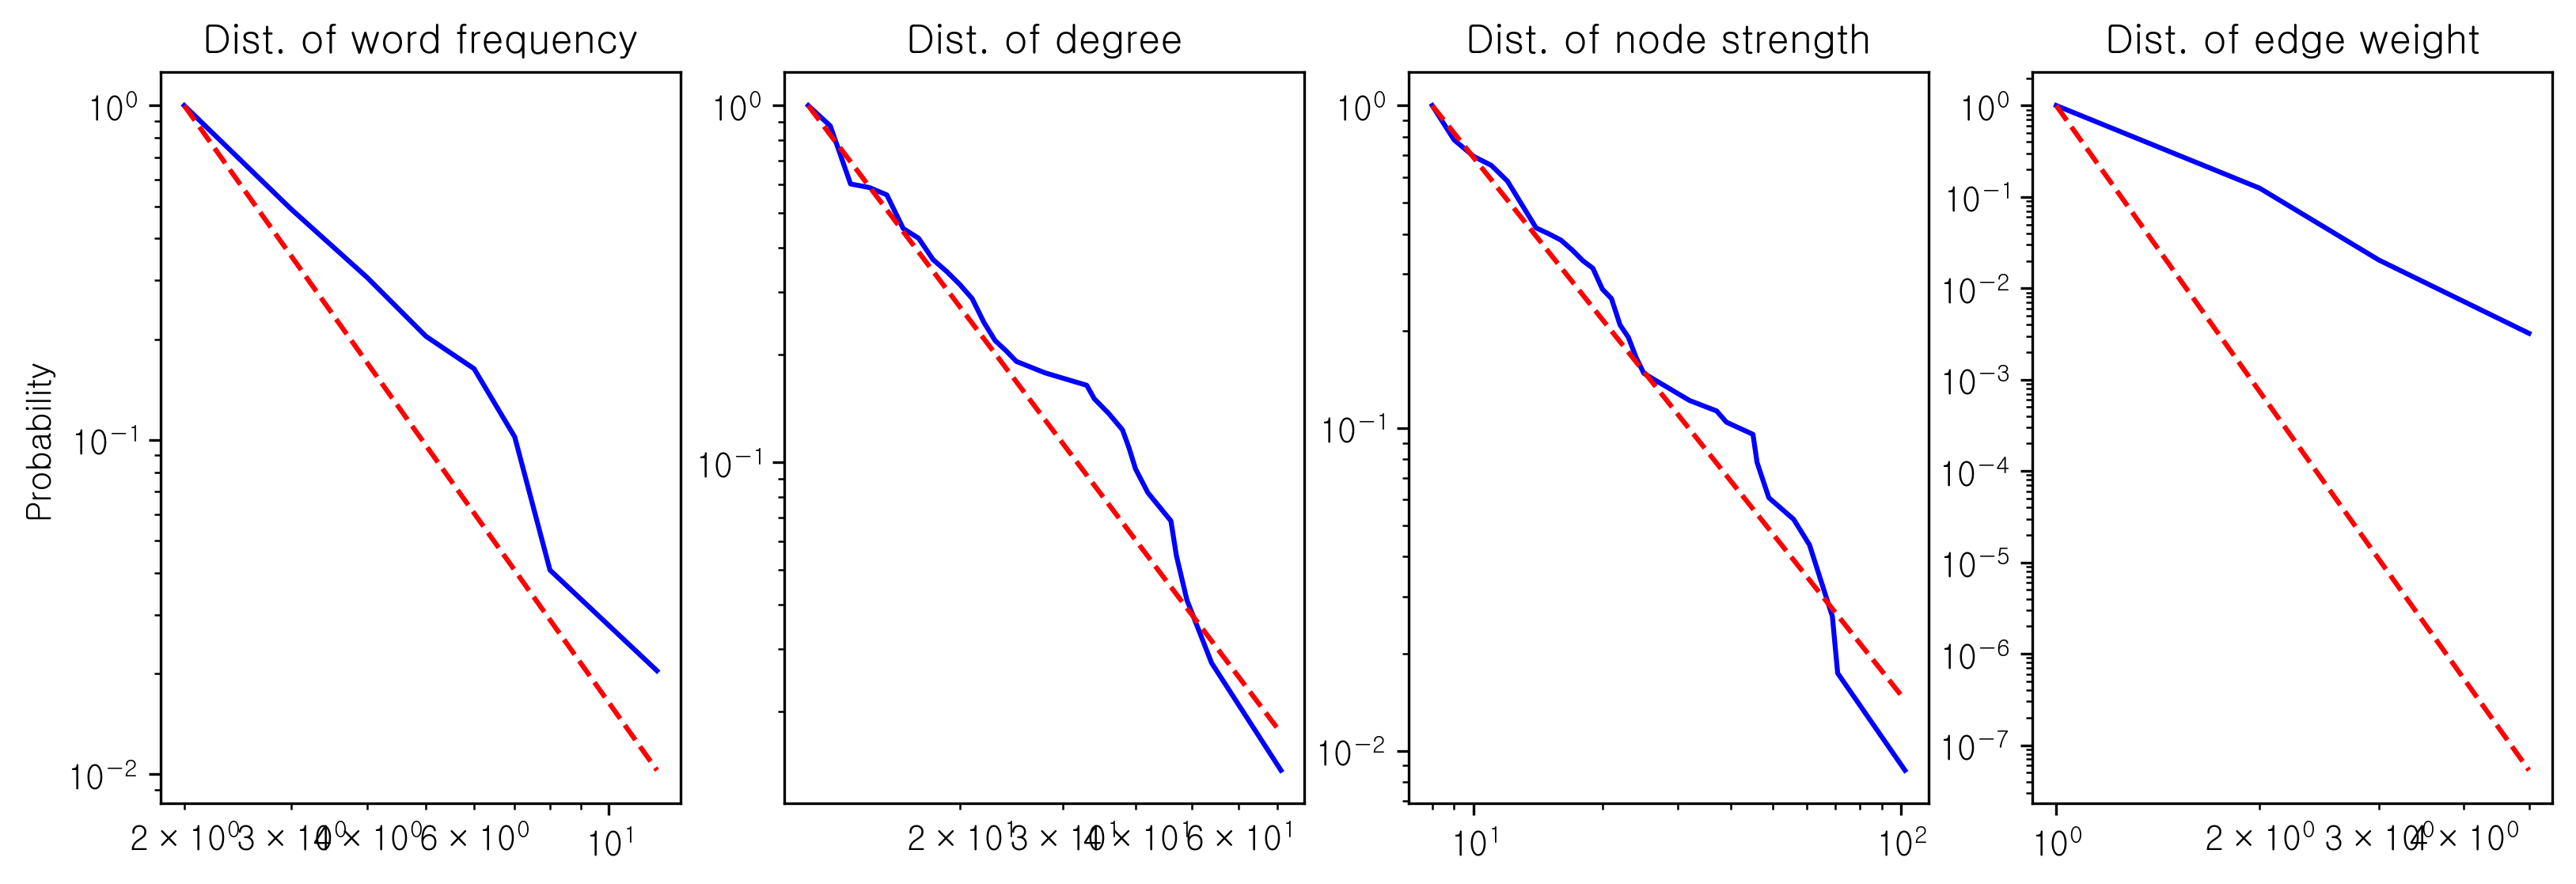

In [47]:
power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

In [48]:
df = info(G)
df.head(20)

Node_F  Node Frequency Node_ND  Node Degree Node_NS  Node Strength  \
0      설명            12.0      설명         71.0      설명          102.0   
1      물체             8.0    일상생활         54.0    일상생활           71.0   
2      이용             7.0      이해         49.0      이용           69.0   
3    일상생활             7.0      이용         47.0      이해           61.0   
4      운동             7.0      물체         46.0      물체           61.0   
5      물질             6.0      표현         42.0      표현           56.0   
6      표현             6.0      운동         40.0      특징           49.0   
7      이해             6.0      특징         39.0      다양           46.0   
8      특징             5.0      다양         38.0      운동           46.0   
9      관계             5.0      관계         36.0      물질           45.0   
10     과정             4.0      과정         34.0      관계           45.0   
11     다양             4.0      물질         33.0      과정           39.0   
12     상태             4.0       힘         28.0       힘           37.0   
13   입자모형             4.0       예         25.0      원리           32.0   
14      힘             4.0      원리         24.0      상태           27.0   
15     입자             3.0      활용         23.0       예           27.0   
16     활용             3.0      상태         22.0      활용           25.0   
17     관찰             3.0      과학         22.0    입자모형           24.0   
18     변화             3.0      변화         21.0      장치           24.0   
19      예             3.0      장치         21.0      변화           23.0   

          Edge  Edge Weight Node_BC  Betweenness Centrality  
0     (설명, 특징)            5      설명                0.203593  
1     (설명, 이용)            5    일상생활                0.137948  
2     (운동, 물체)            5      물체                0.131425  
3     (물질, 설명)            3      이용                0.127234  
4     (물질, 상태)            3      운동                0.124501  
5      (설명, 힘)            3      이해                0.117064  
6   (설명, 일상생활)            3      표현                0.109710  
7     (설명, 다양)            3      물질                0.098252  
8     (과정, 표현)            3      관계                0.092026  
9     (이용, 표현)            3      과정                0.083015  
10    (이용, 다양)            3      특징                0.079824  
11    (이용, 물체)            3      다양                0.077358  
12    (이용, 원리)            3       힘                0.062167  
13    (표현, 이해)            3      활용                0.054495  
14    (표현, 물체)            3      변화                0.050204  
15  (활용, 일상생활)            3       예                0.047738  
16  (일상생활, 특징)            3      상태                0.047225  
17    (관계, 실험)            3      관찰                0.046459  
18    (이해, 물체)            3      원리                0.045755  
19    (구성, 물질)            2      입자                0.045290

# 통합과학

C:\Users\user\AppData\Local\Temp\ipykernel_37072\1236278211.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_37072\1236278211.py:56: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


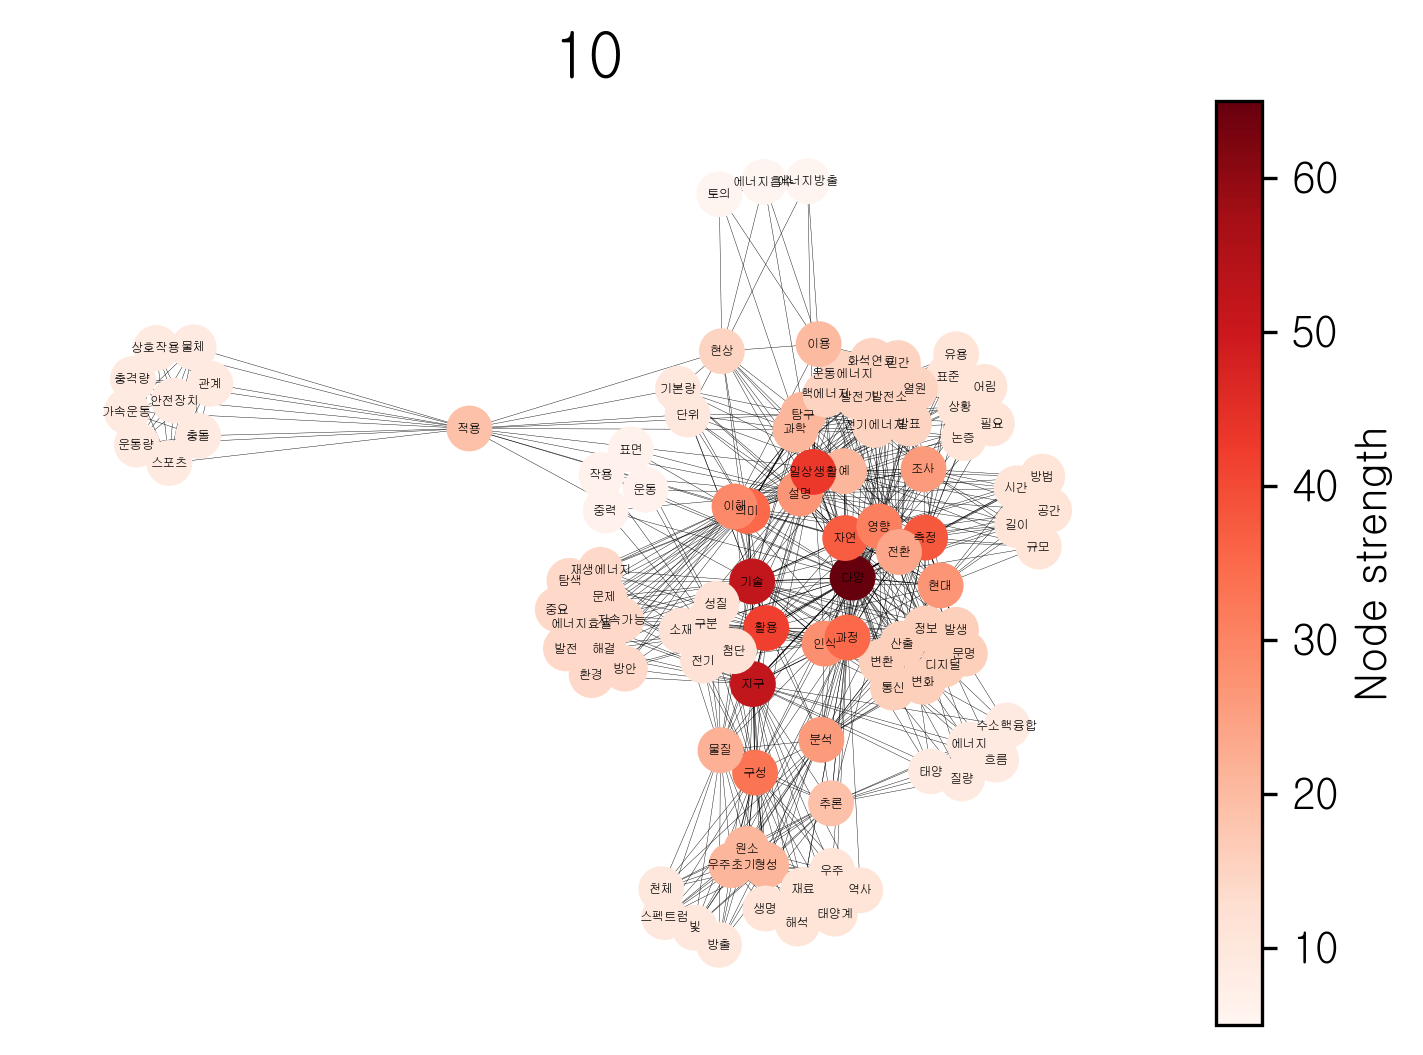

In [49]:
subject_graph(2, file_lst[2], '10')

In [50]:
G = graph(2, file_lst[2])

In [51]:
hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight = basic_info(G)

Number of nodes: 105
Number of edges: 834
WordFreq avg: 1.45, WordFreq std: 0.89
Degree avg: 15.89, Degree std: 9.08
NodeWeight avg: 16.63, NodeWeight std: 10.59
EdgeWeight avg: 1.05, EdgeWeight std: 0.23


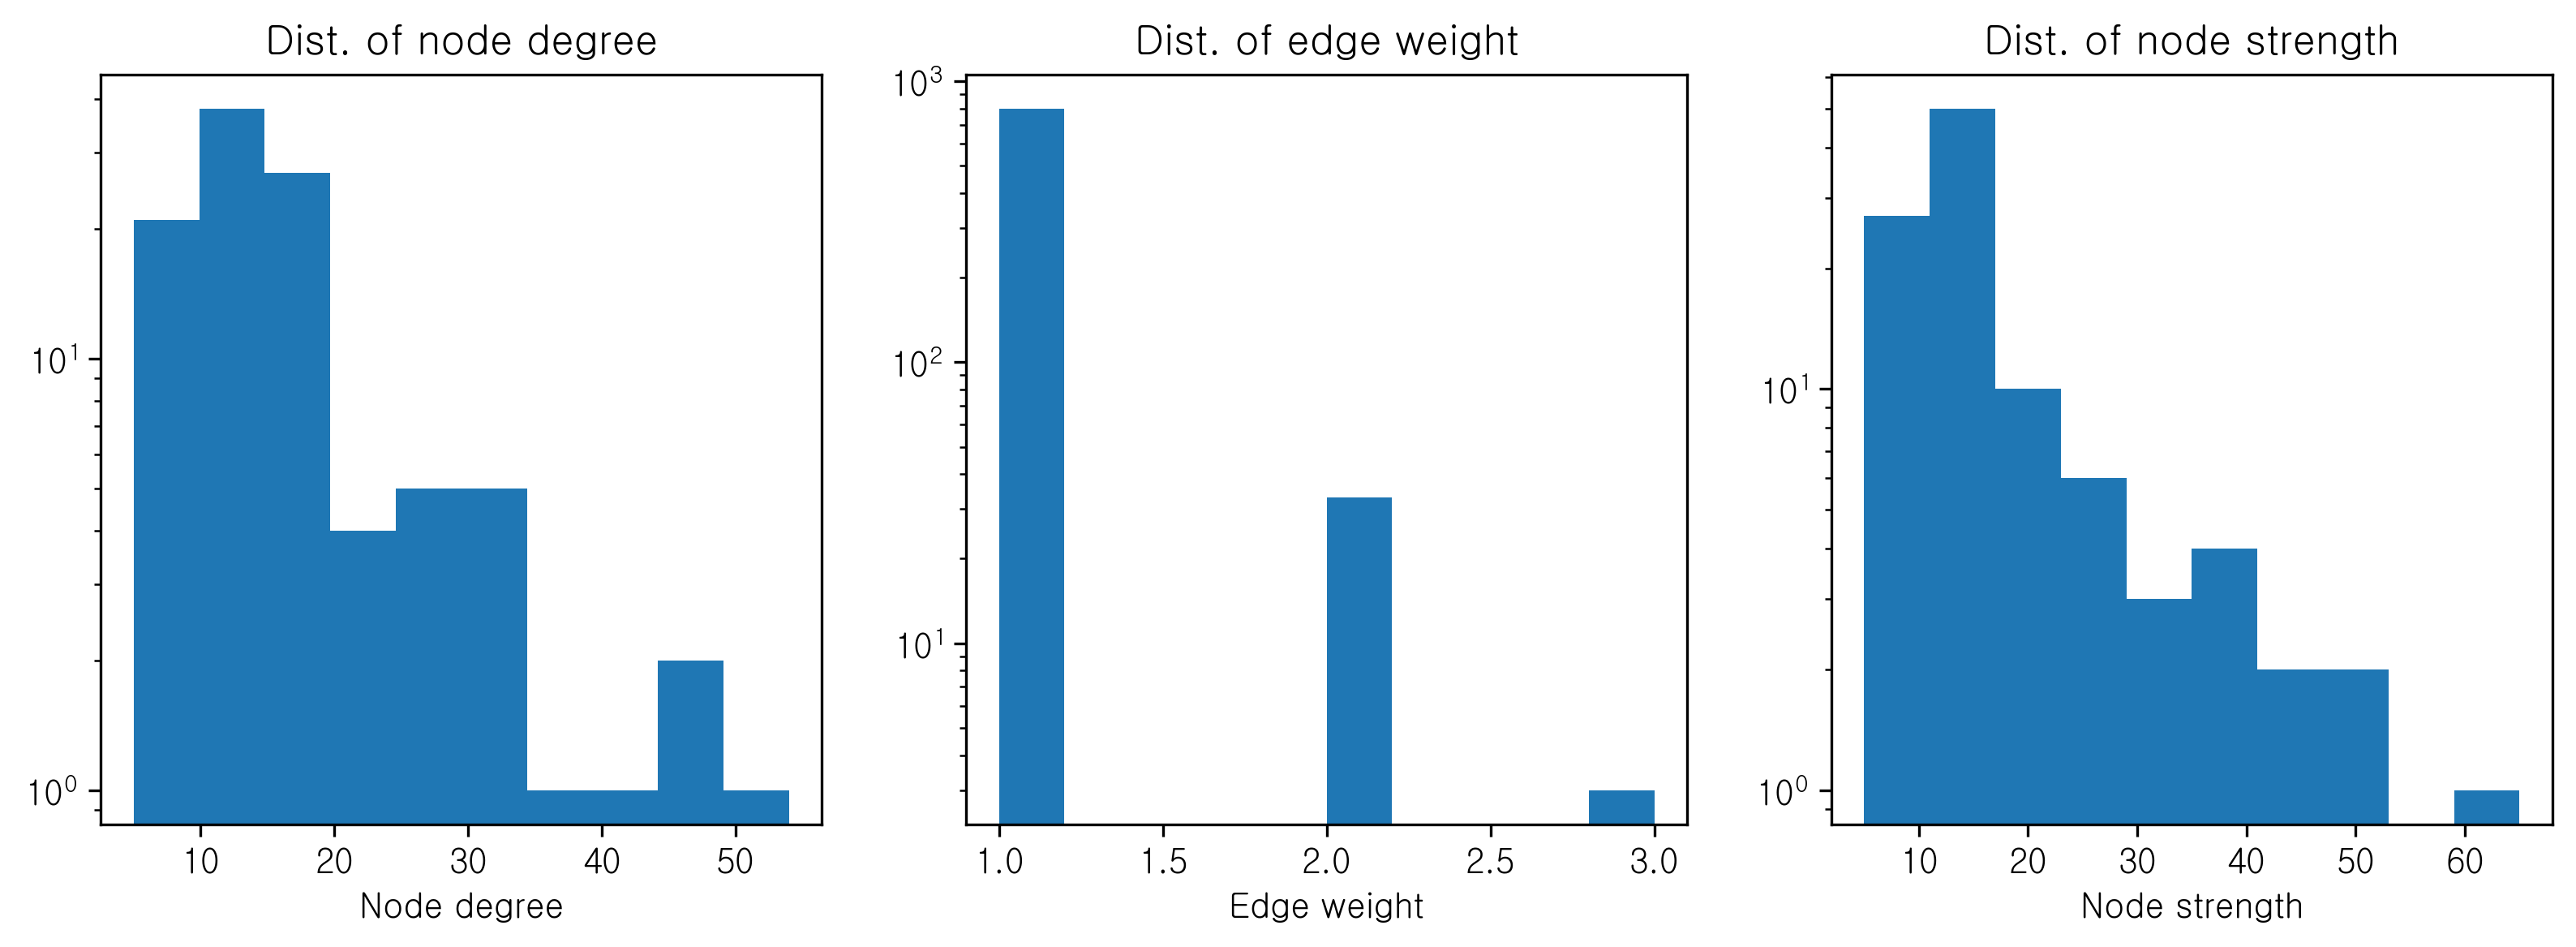

In [52]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

Calculating best minimal value for power law fit
1: Pass, 7.182078107669997

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions


Calculating best minimal value for power law fit


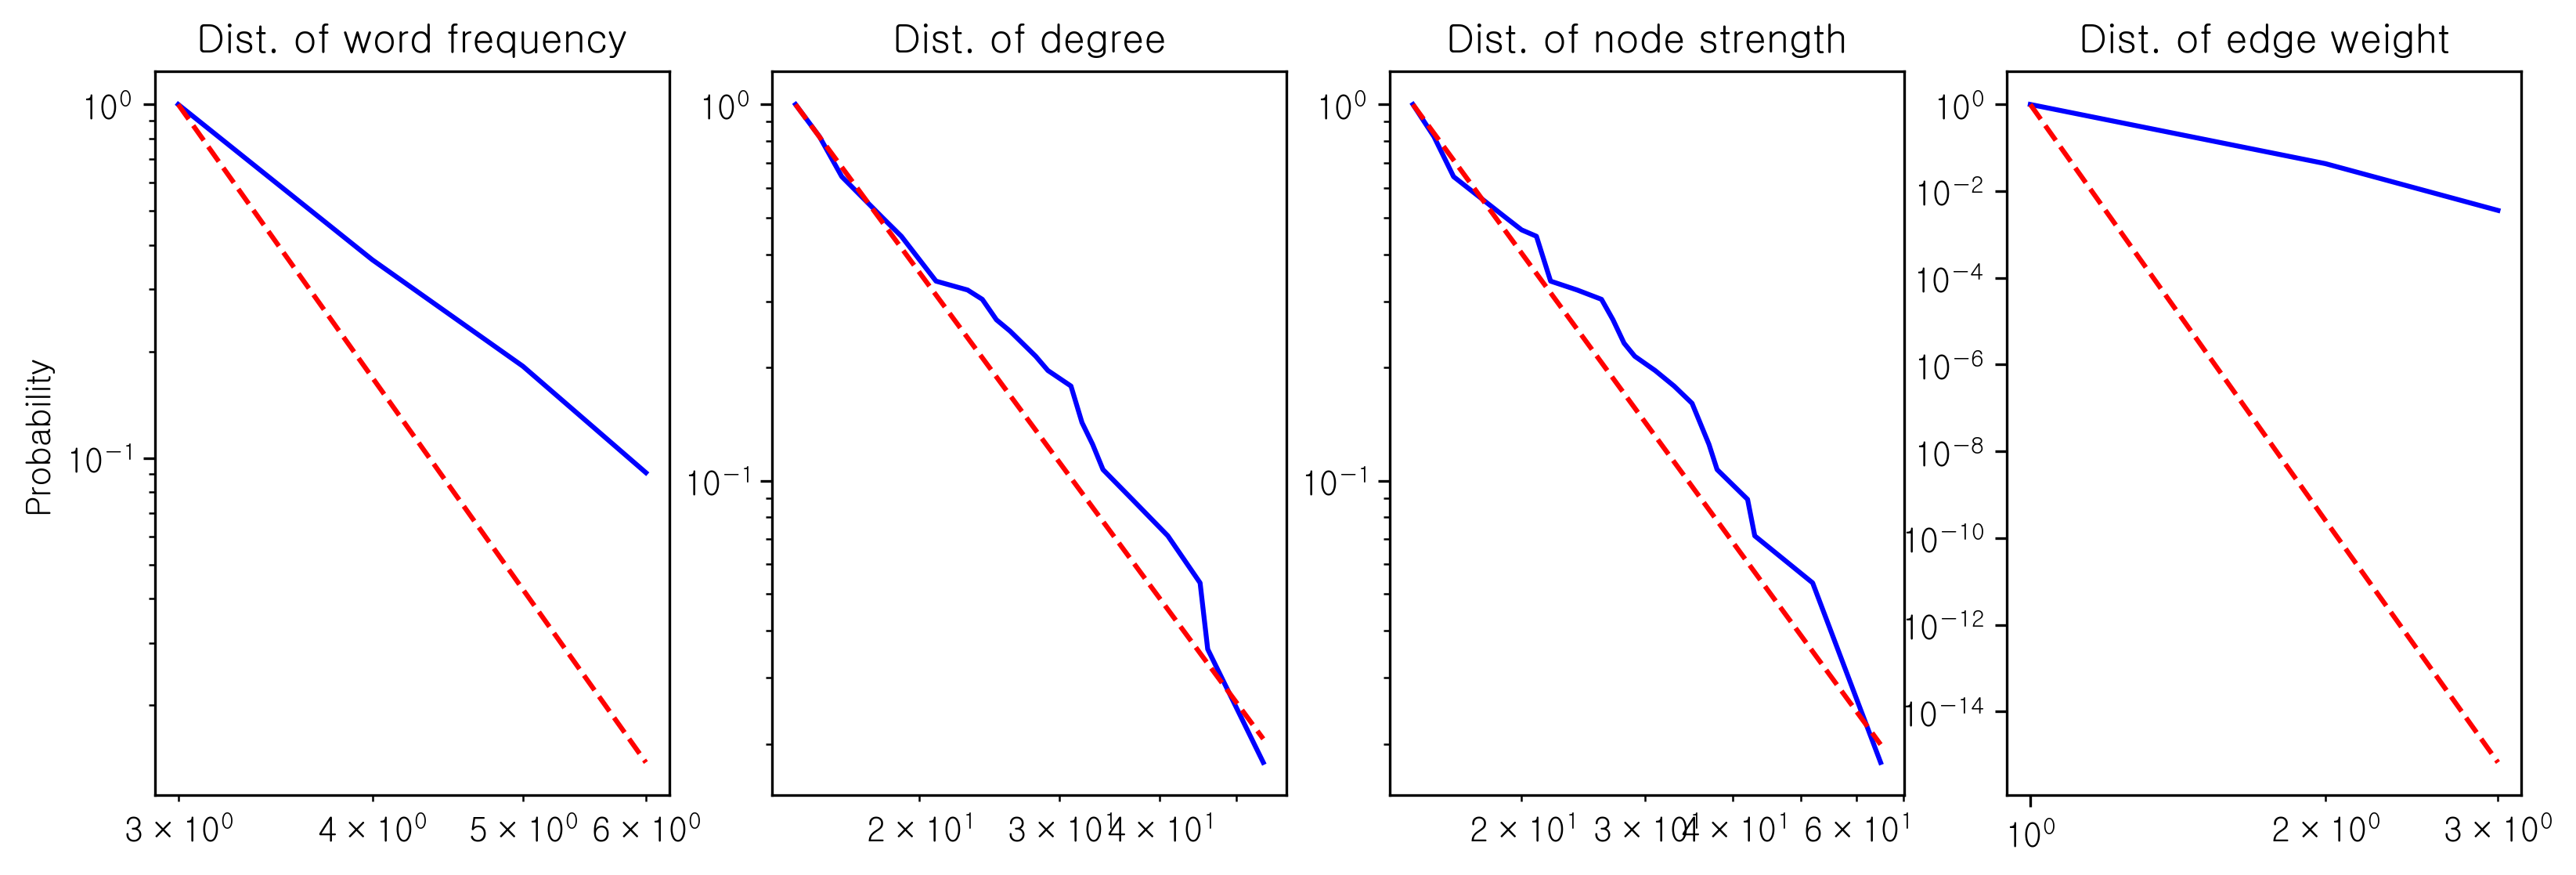

In [53]:
power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

In [54]:
df = info(G)
df.head(20)

Node_F  Node Frequency Node_ND  Node Degree Node_NS  Node Strength  \
0      다양             6.0      다양         54.0      다양           65.0   
1      지구             5.0      지구         46.0      기술           52.0   
2      기술             4.0      기술         45.0      지구           52.0   
3    일상생활             4.0    일상생활         41.0    일상생활           43.0   
4      측정             3.0      활용         37.0      활용           42.0   
5      자연             3.0      측정         34.0      측정           38.0   
6      설명             3.0      과정         33.0      자연           37.0   
7      의미             3.0      의미         32.0      의미           35.0   
8      활용             3.0      자연         31.0      과정           35.0   
9      구성             3.0      영향         31.0      구성           33.0   
10     과정             3.0      이해         29.0      영향           31.0   
11     현대             2.0      구성         28.0      이해           29.0   
12     조사             2.0      조사         26.0      인식           28.0   
13      예             2.0      분석         26.0      현대           27.0   
14     탐구             2.0      인식         25.0      설명           27.0   
15     적용             2.0      현대         24.0      조사           26.0   
16     현상             2.0      설명         24.0      분석           26.0   
17     과학             2.0      전환         23.0      전환           24.0   
18     인식             2.0      물질         21.0      물질           22.0   
19     분석             2.0       예         19.0       예           21.0   

          Edge  Edge Weight Node_BC  Betweenness Centrality  
0     (측정, 다양)            3      다양                0.178566  
1     (다양, 지구)            3      적용                0.174896  
2     (기술, 활용)            3      지구                0.170978  
3     (현대, 측정)            2      기술                0.139082  
4     (현대, 다양)            2    일상생활                0.135013  
5     (현대, 자연)            2      과정                0.109882  
6     (측정, 자연)            2      의미                0.106438  
7     (다양, 자연)            2      활용                0.094342  
8     (다양, 설명)            2      자연                0.090540  
9   (다양, 일상생활)            2      설명                0.085448  
10    (다양, 인식)            2      측정                0.083755  
11    (다양, 기술)            2      구성                0.080416  
12    (다양, 활용)            2      이해                0.077222  
13     (자연, 예)            2      영향                0.073442  
14    (자연, 설명)            2      분석                0.072762  
15    (자연, 기술)            2      조사                0.069208  
16     (예, 설명)            2      전환                0.059695  
17    (탐구, 의미)            2      현상                0.058557  
18    (탐구, 과학)            2       예                0.055008  
19    (의미, 기술)            2      과학                0.053681

# 물리학

C:\Users\user\AppData\Local\Temp\ipykernel_37072\1236278211.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_37072\1236278211.py:56: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


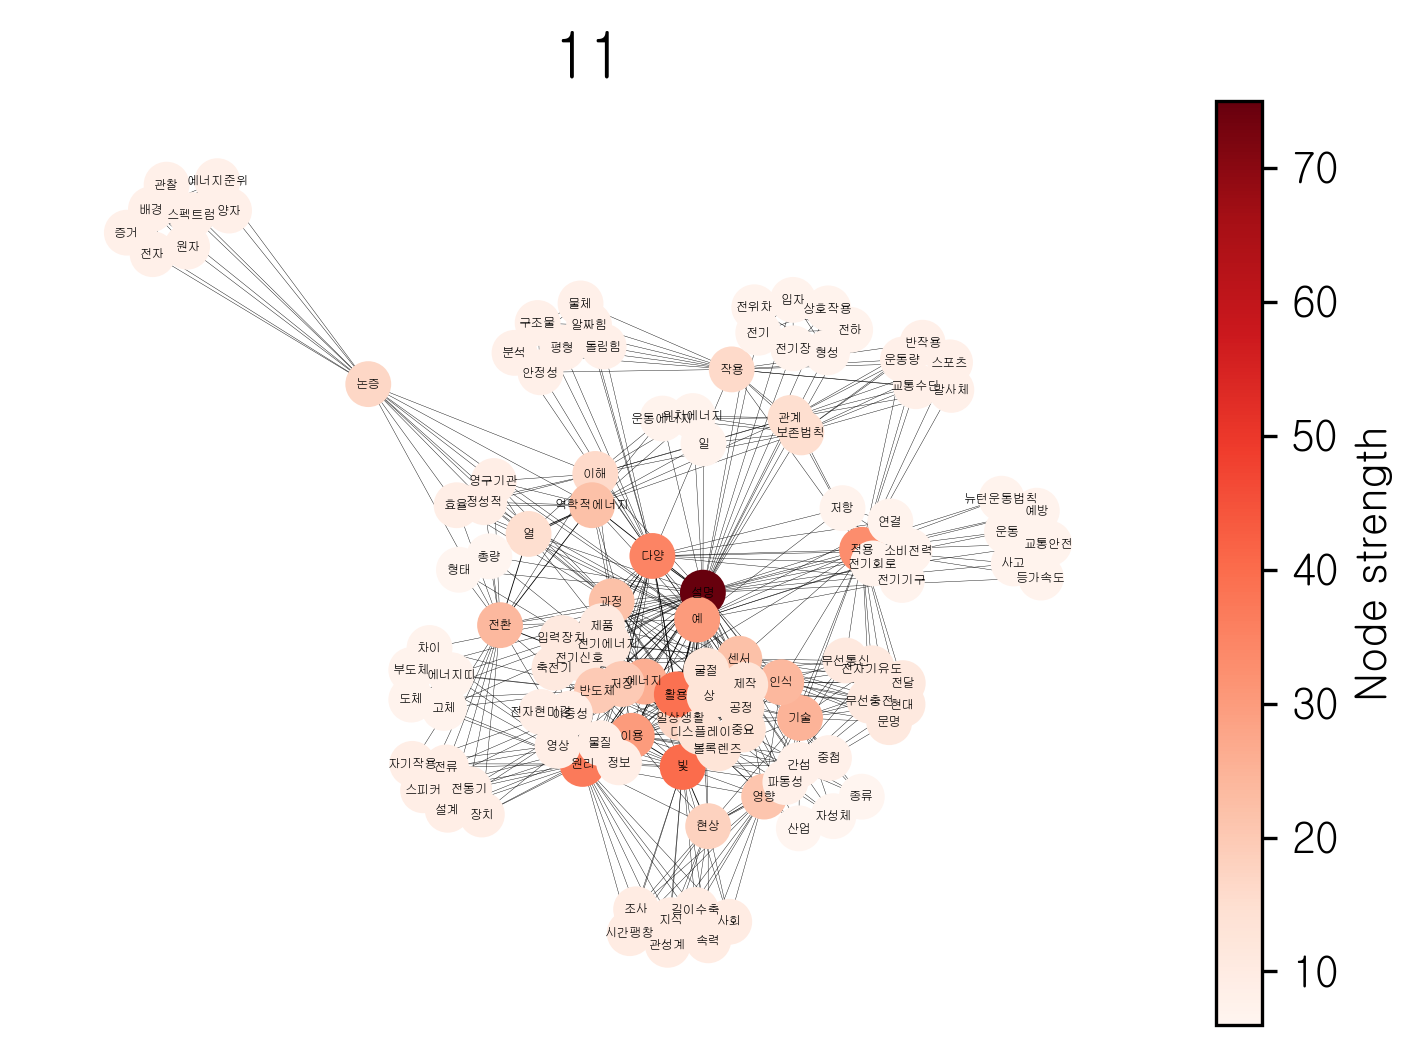

In [55]:
subject_graph(2, file_lst[3], '11')

In [56]:
G = graph(2, file_lst[3])

In [57]:
hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight = basic_info(G)

Number of nodes: 119
Number of edges: 715
WordFreq avg: 1.42, WordFreq std: 1.05
Degree avg: 12.02, Degree std: 8.27
NodeWeight avg: 12.42, NodeWeight std: 9.34
EdgeWeight avg: 1.03, EdgeWeight std: 0.2


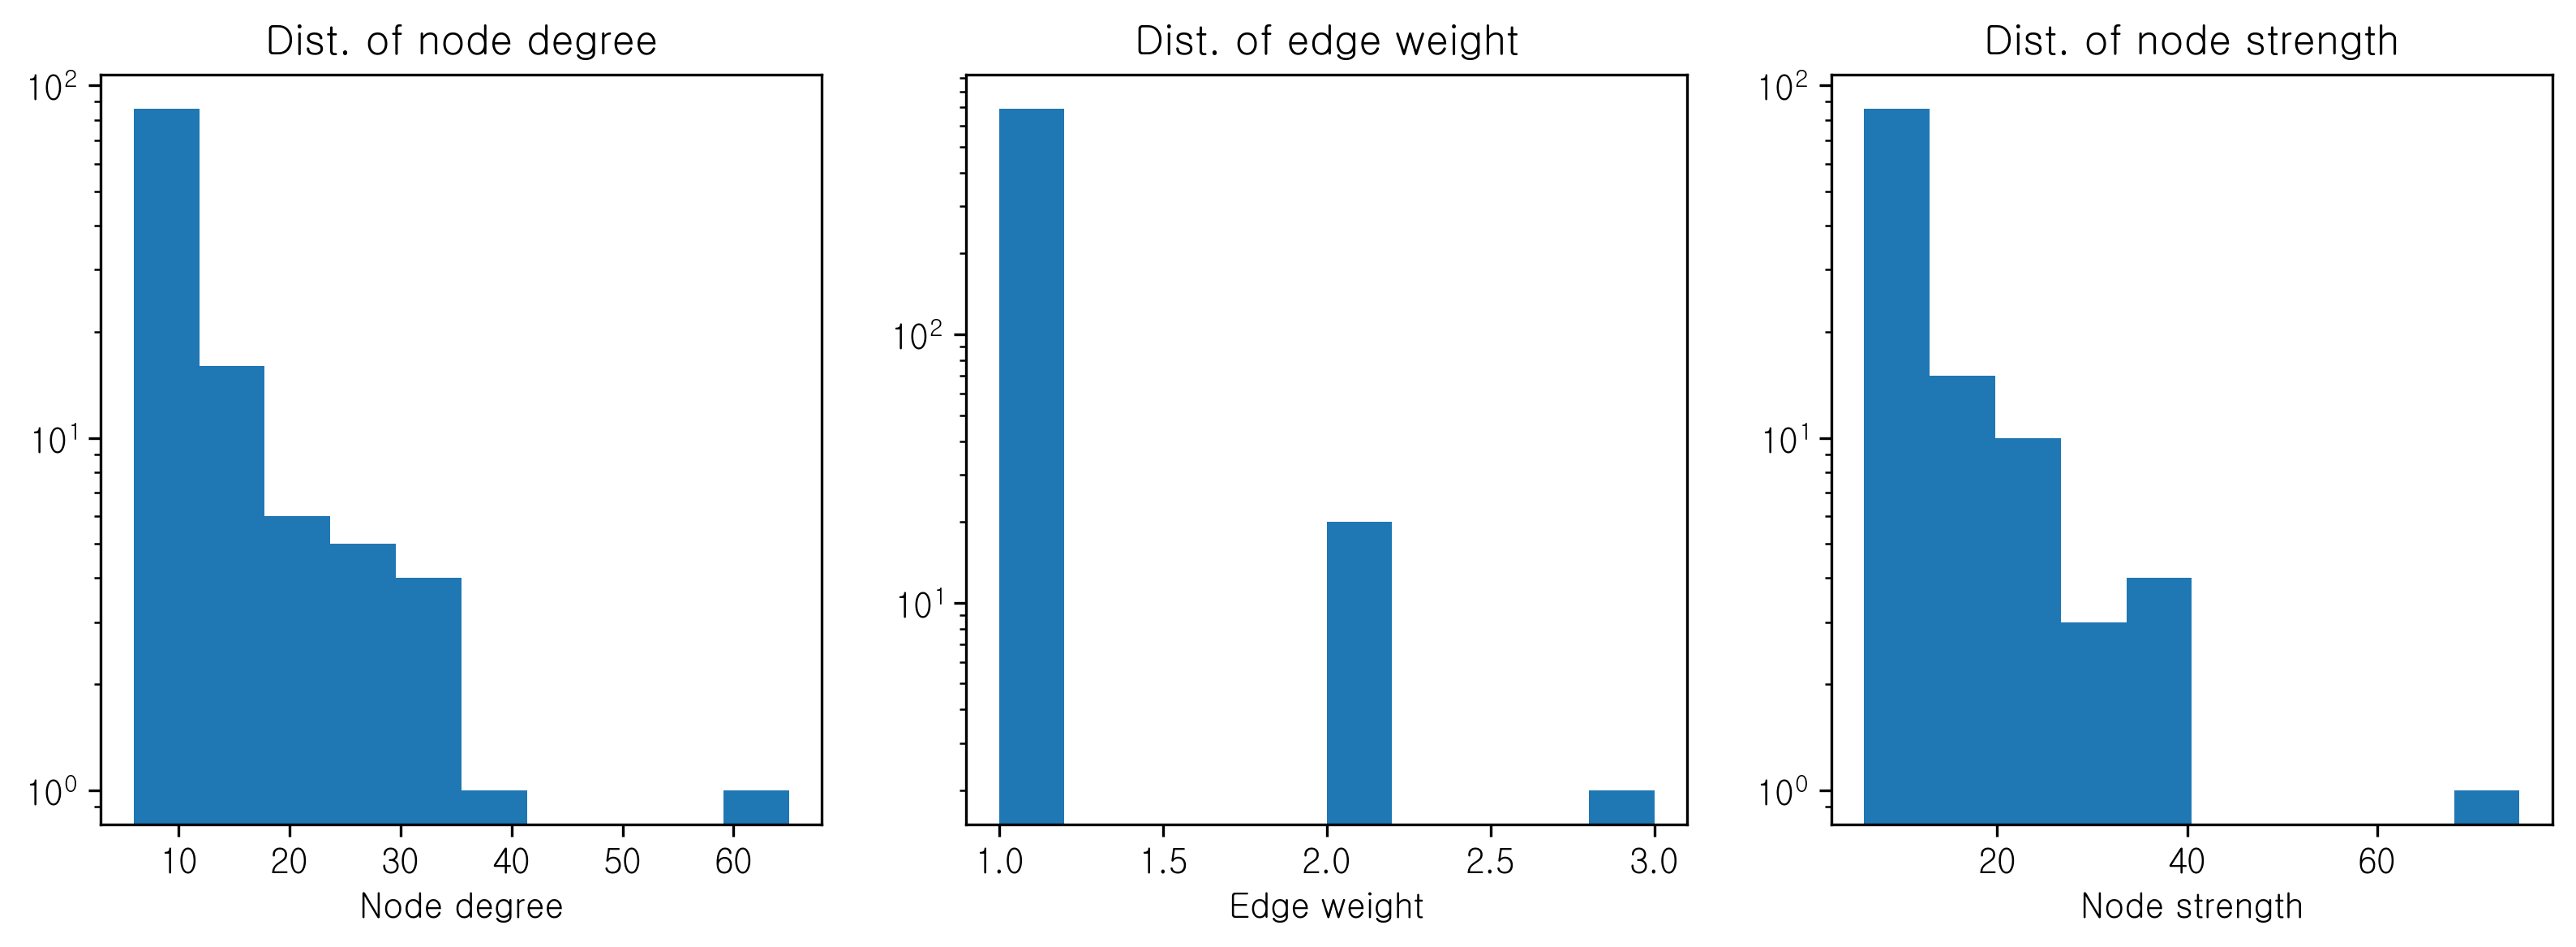

In [58]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1408: RuntimeWarning: overflow encountered in scalar power
  C = ( self.Lambda**(1-self.alpha) /
D:\anaconda3\Lib\site-packages\powerlaw.py:1408: RuntimeWarning: invalid value encountered in scalar divide
  C = ( self.Lambda**(1-self.alpha) /
D:\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:917: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
D:\anaconda3\Lib\site-packages\powerlaw.py:1396: RuntimeWarning: overflow encountered in scalar power
  self.Lambda**(1-self.alpha)
D:\anaconda3\Lib\site-packages\powerlaw.py:1808: RuntimeWarning: invalid value encountered in subtract
  ( (loglikelihoods1-loglikelihoods2) - mean_

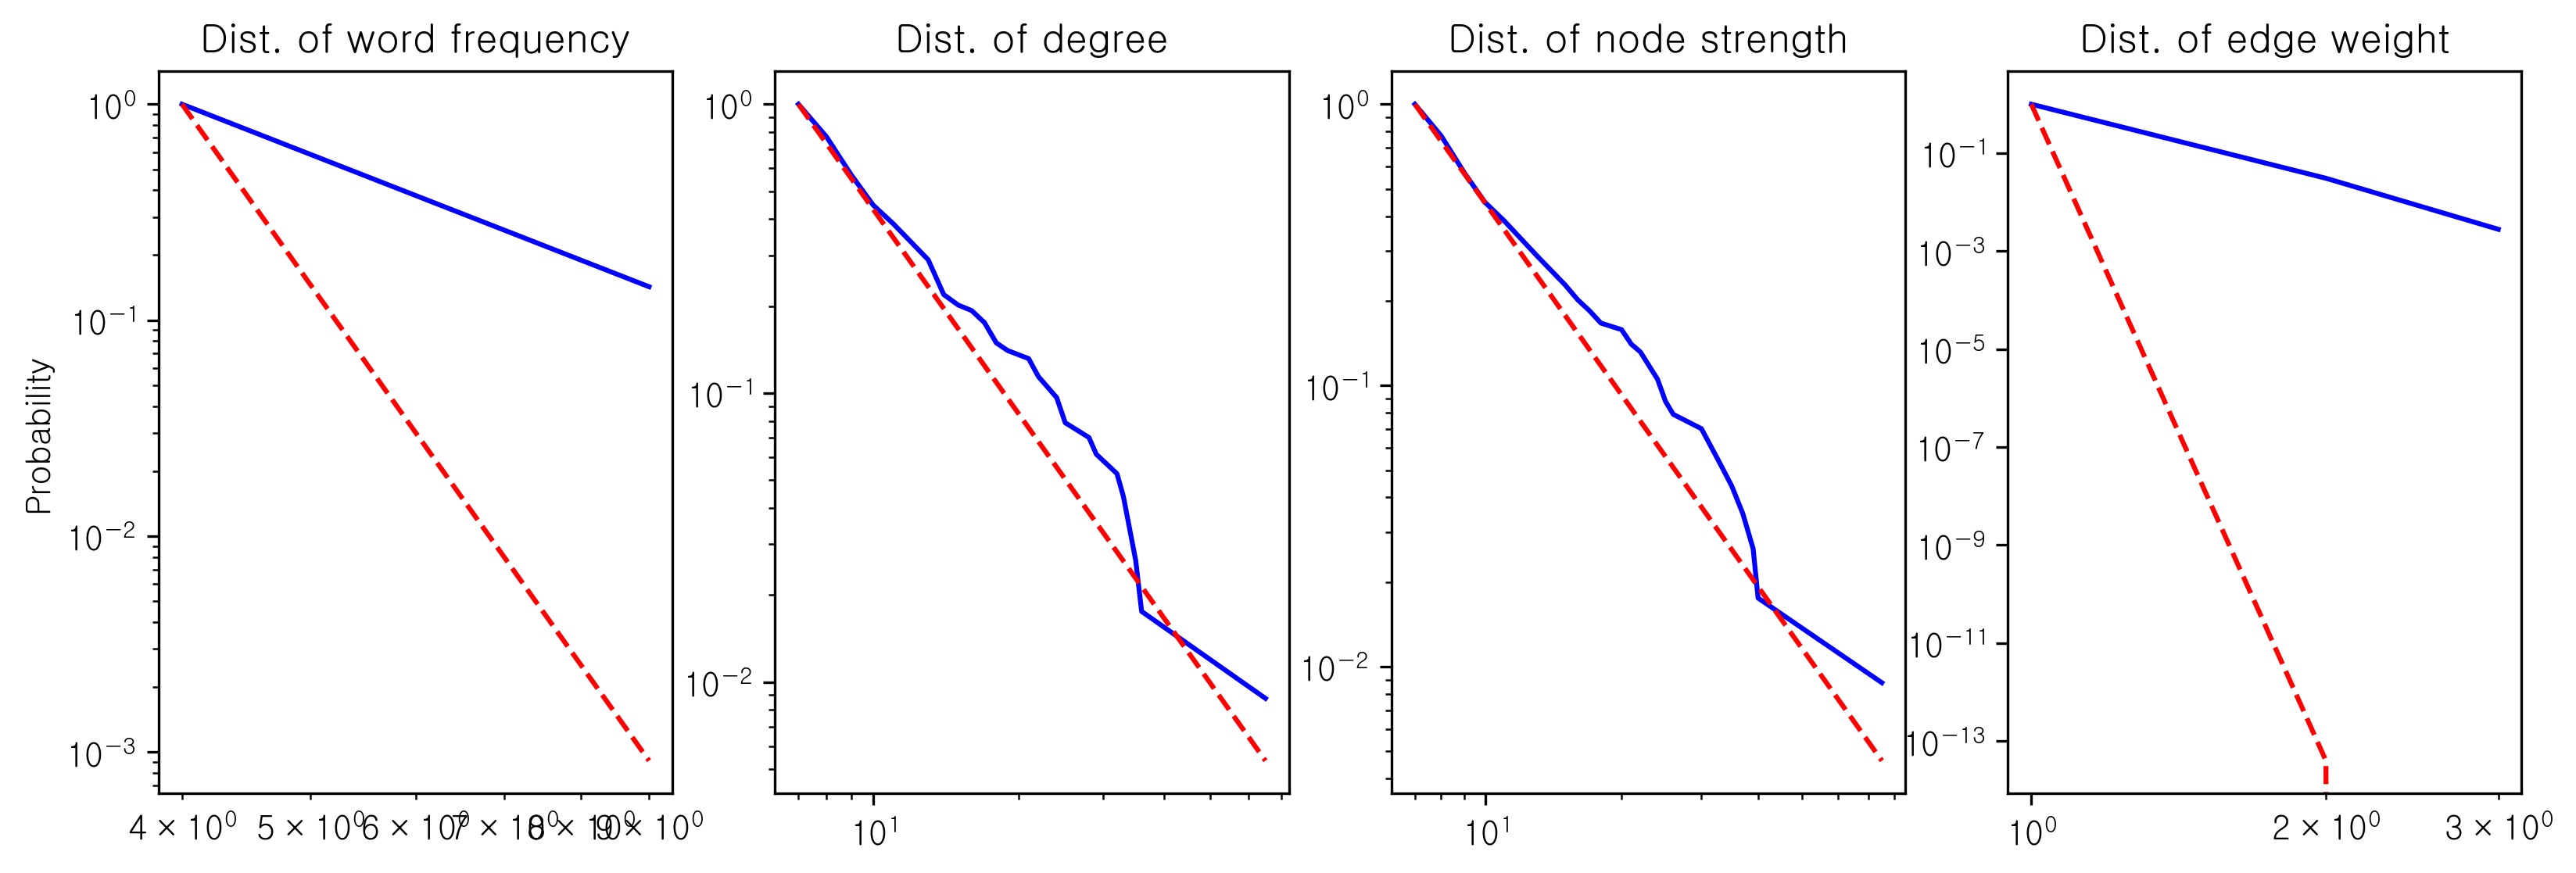

In [59]:
power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

In [60]:
df = info(G)
df.head(20)

Node_F  Node Frequency Node_ND  Node Degree Node_NS  Node Strength  \
0       설명             9.0      설명         65.0      설명           75.0   
1       다양             4.0      원리         36.0       빛           40.0   
2       적용             4.0       빛         35.0      활용           39.0   
3        예             4.0      적용         33.0      원리           37.0   
4       원리             4.0      활용         33.0      다양           35.0   
5       활용             4.0      다양         32.0      적용           33.0   
6        빛             4.0       예         29.0       예           30.0   
7   역학적에너지             3.0      이용         28.0      이용           30.0   
8       전환             3.0     에너지         25.0     에너지           26.0   
9      에너지             3.0      기술         24.0      기술           25.0   
10      기술             3.0      인식         24.0      전환           24.0   
11      이용             3.0      과정         22.0      인식           24.0   
12      작용             2.0      센서         22.0  역학적에너지           22.0   
13      관계             2.0      전환         21.0      과정           22.0   
14    보존법칙             2.0      영향         21.0      센서           22.0   
15      이해             2.0     반도체         19.0      영향           21.0   
16       열             2.0  역학적에너지         18.0      저장           20.0   
17      과정             2.0      논증         17.0     반도체           20.0   
18      논증             2.0      저장         17.0      현상           18.0   
19      센서             2.0      현상         17.0      논증           17.0   

            Edge  Edge Weight Node_BC  Betweenness Centrality  
0       (설명, 활용)            3      설명                0.355189  
1        (설명, 빛)            3      적용                0.175339  
2       (다양, 활용)            2      다양                0.175326  
3       (다양, 저장)            2      논증                0.143430  
4       (다양, 설명)            2      원리                0.141487  
5   (설명, 역학적에너지)            2       예                0.139287  
6       (설명, 원리)            2       빛                0.121124  
7       (설명, 저장)            2      활용                0.107025  
8       (설명, 이용)            2      전환                0.093537  
9      (설명, 반도체)            2     에너지                0.090565  
10    (관계, 보존법칙)            2  역학적에너지                0.087603  
11  (이해, 역학적에너지)            2      이용                0.085981  
12  (역학적에너지, 전환)            2      과정                0.083675  
13   (역학적에너지, 열)            2      작용                0.082364  
14     (전환, 에너지)            2      기술                0.071847  
15       (전환, 열)            2      이해                0.066307  
16       (예, 기술)            2      영향                0.062938  
17    (일상생활, 활용)            2      인식                0.061847  
18      (활용, 저장)            2      관계                0.059082  
19       (활용, 빛)            2    보존법칙                0.059082

# 역학과 에너지

C:\Users\user\AppData\Local\Temp\ipykernel_37072\1236278211.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_37072\1236278211.py:56: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


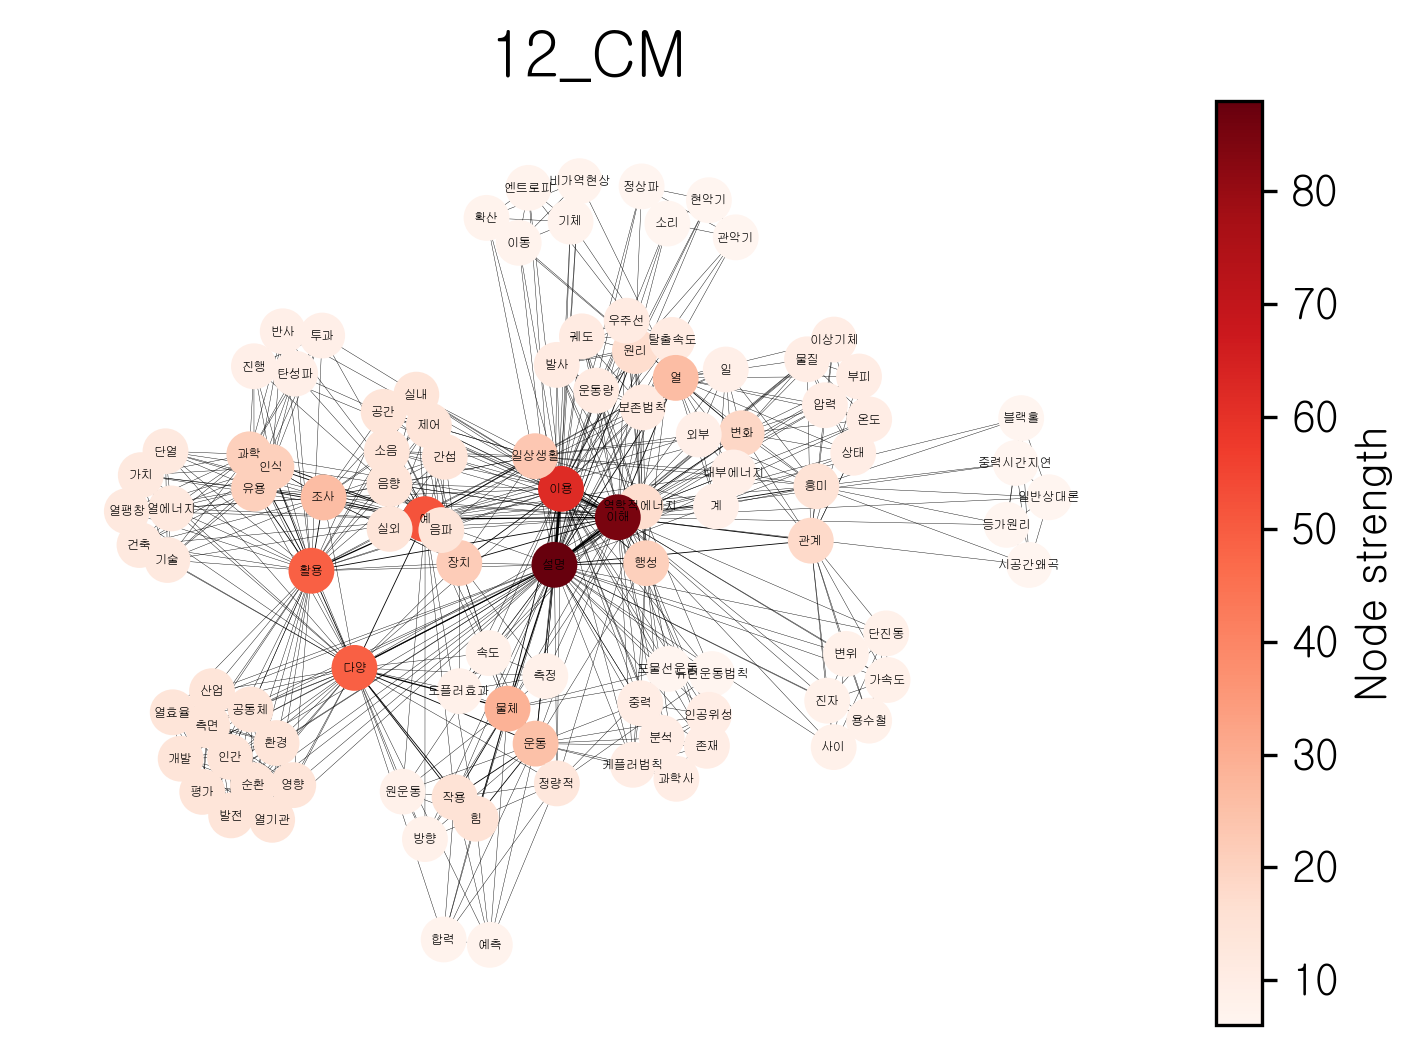

In [61]:
subject_graph(2, file_lst[4], '12_CM')

In [62]:
G = graph(2, file_lst[4])

In [63]:
hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight = basic_info(G)

Number of nodes: 105
Number of edges: 715
WordFreq avg: 1.53, WordFreq std: 1.46
Degree avg: 13.62, Degree std: 10.54
NodeWeight avg: 14.88, NodeWeight std: 13.66
EdgeWeight avg: 1.09, EdgeWeight std: 0.39


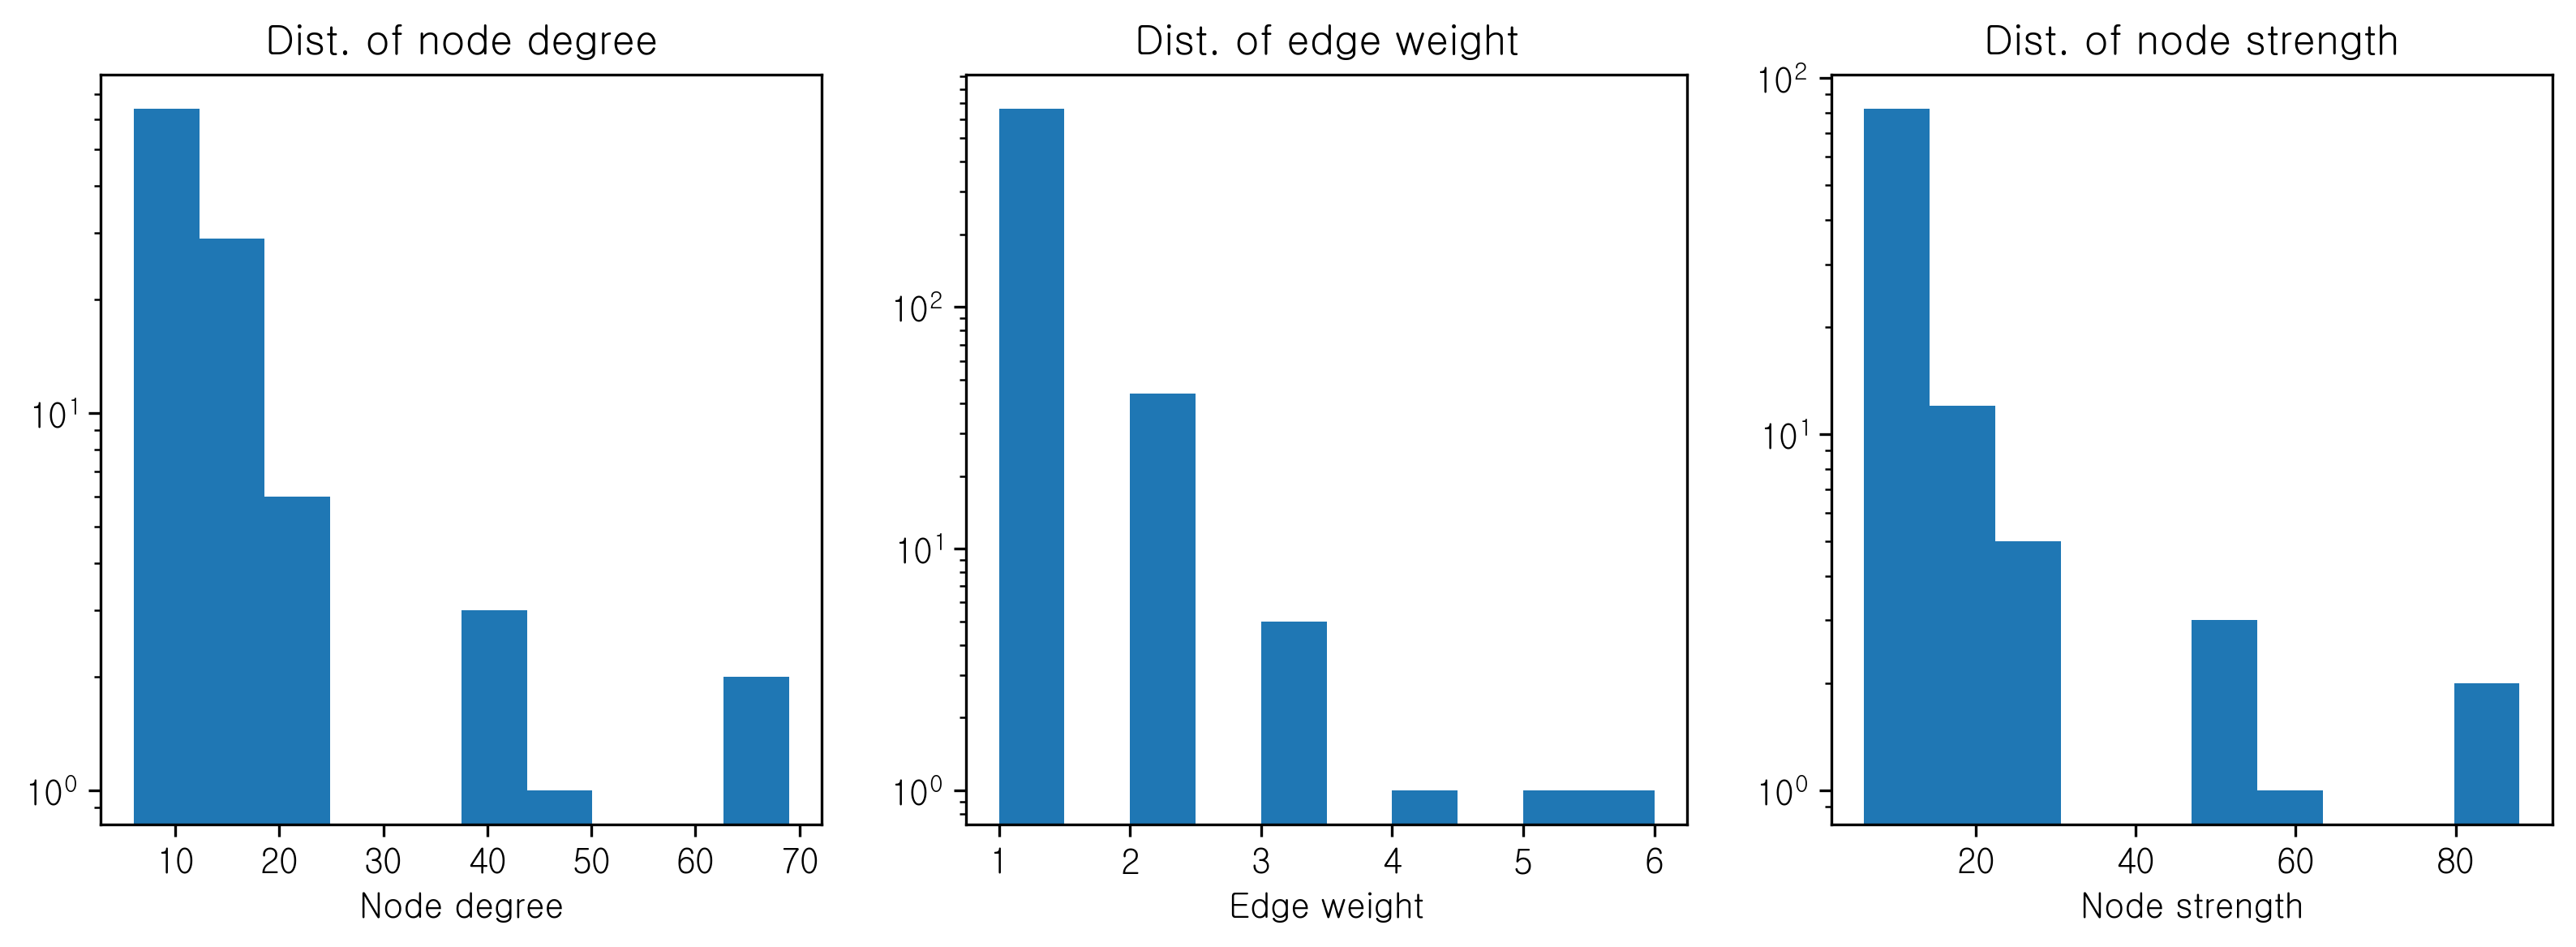

In [64]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
2: Pass, 3.0040675462513686

Calculating best minimal value for power law fit


Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
Assuming nested distributions


3: Pass, 2.687549315988754

Calculating best minimal value for power law fit


Assuming nested distributions


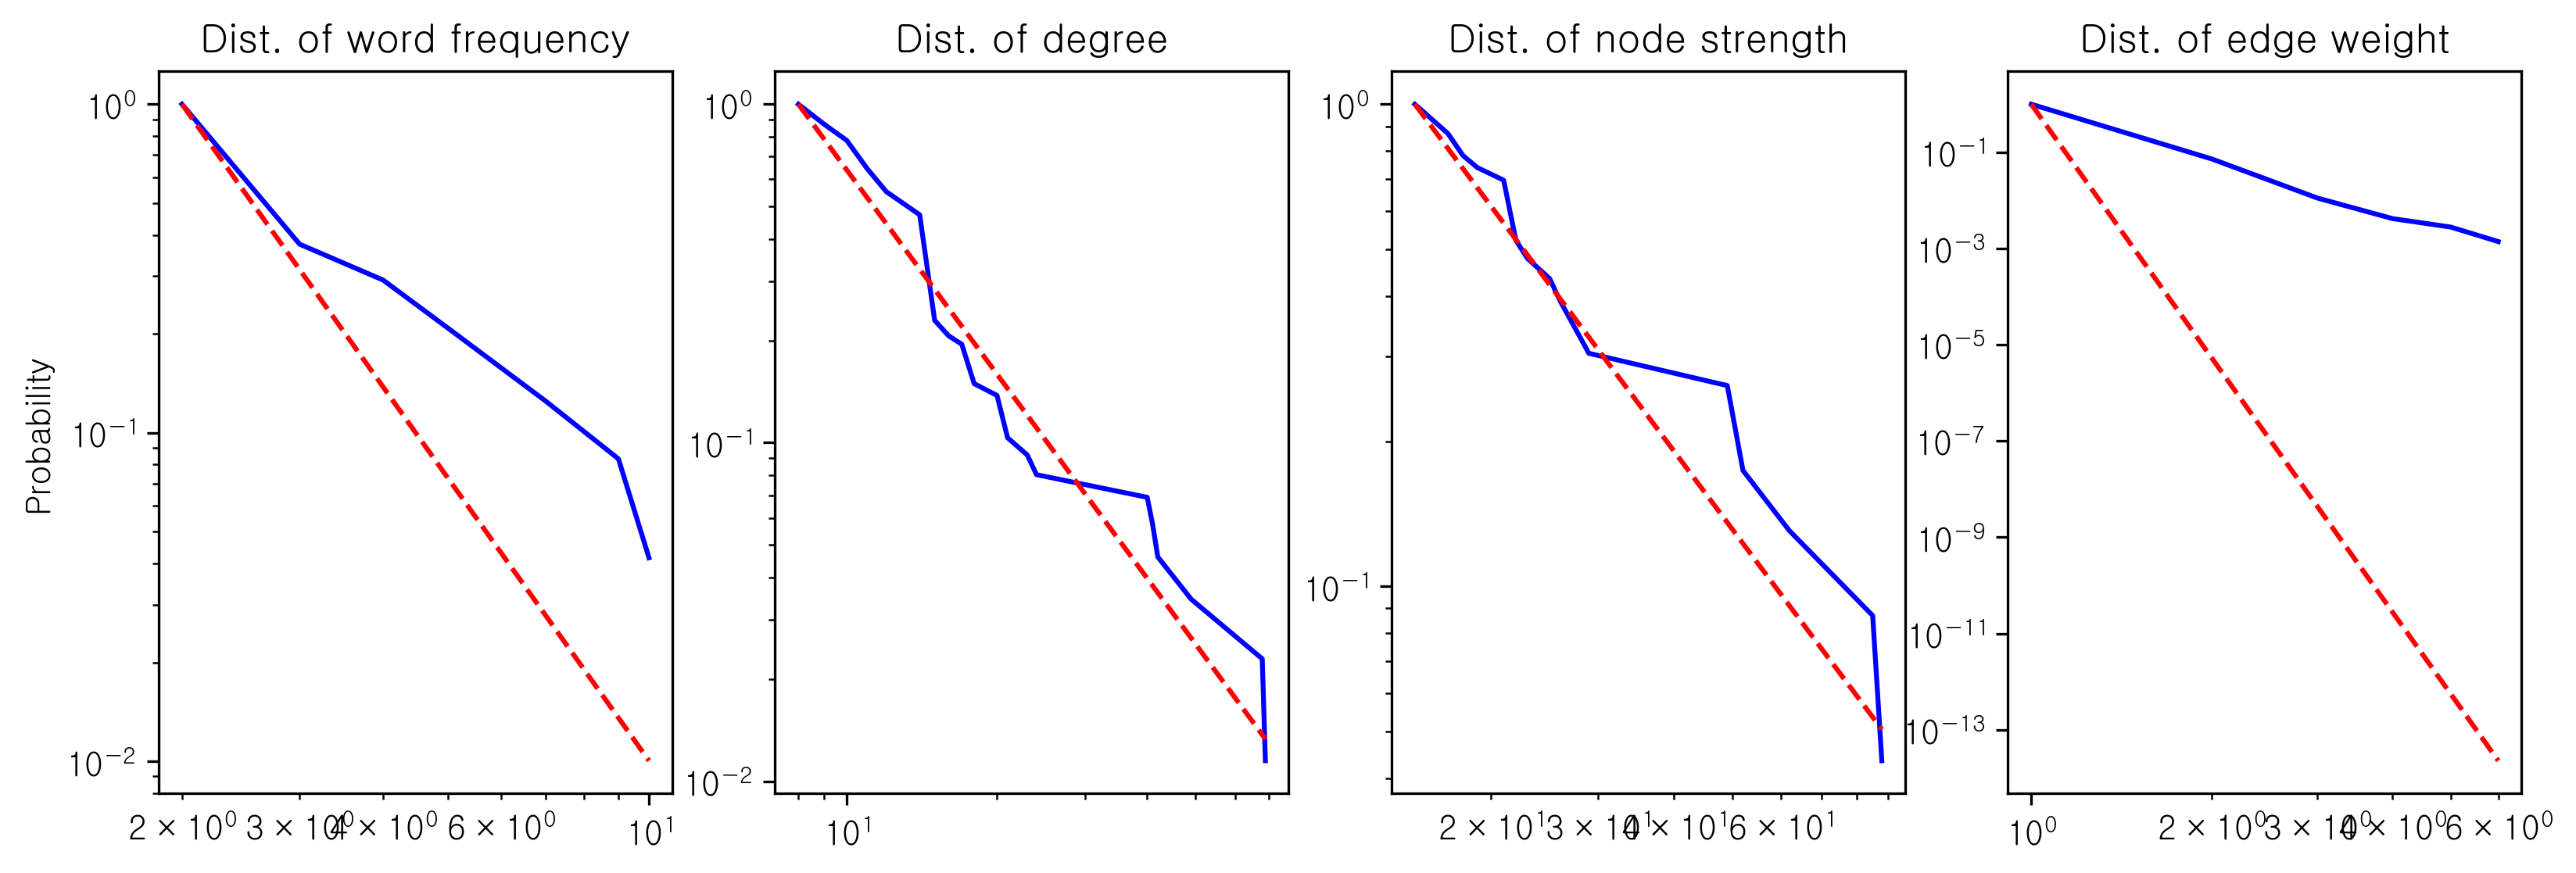

In [65]:
power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

In [66]:
df = info(G)
df.head(20)

Node_F  Node Frequency Node_ND  Node Degree Node_NS  Node Strength  \
0       설명            10.0      설명         69.0      설명           88.0   
1       이해             9.0      이해         68.0      이해           85.0   
2       이용             7.0      이용         49.0      이용           62.0   
3       다양             5.0       예         42.0       예           52.0   
4        예             5.0      활용         41.0      다양           49.0   
5       물체             4.0      다양         40.0      활용           49.0   
6       활용             4.0      조사         24.0      물체           29.0   
7       운동             3.0       열         23.0      조사           26.0   
8        열             3.0    일상생활         21.0       열           26.0   
9      정량적             2.0      운동         20.0      운동           25.0   
10       힘             2.0      물체         20.0    일상생활           23.0   
11      작용             2.0      장치         20.0      장치           22.0   
12  역학적에너지             2.0      행성         18.0      행성           21.0   
13      행성             2.0      인식         17.0      인식           21.0   
14      원리             2.0      유용         17.0      유용           21.0   
15      흥미             2.0      과학         17.0      과학           21.0   
16      인식             2.0      변화         17.0      변화           19.0   
17      조사             2.0      관계         16.0      관계           18.0   
18      유용             2.0  역학적에너지         15.0  역학적에너지           17.0   
19      과학             2.0      원리         15.0      원리           17.0   

         Edge  Edge Weight Node_BC  Betweenness Centrality  
0    (설명, 이용)            6      설명                0.319073  
1    (설명, 이해)            5      이해                0.316466  
2    (이용, 이해)            4      이용                0.194349  
3    (다양, 물체)            3      다양                0.162439  
4    (다양, 설명)            3       예                0.152214  
5    (물체, 설명)            3      활용                0.148446  
6     (예, 활용)            3       열                0.088626  
7     (예, 이해)            3      물체                0.071094  
8    (운동, 다양)            2      운동                0.066415  
9     (운동, 힘)            2    일상생활                0.060420  
10   (운동, 작용)            2      조사                0.059062  
11   (운동, 물체)            2      흥미                0.058874  
12   (운동, 설명)            2      관계                0.054893  
13  (정량적, 물체)            2      변화                0.052301  
14    (다양, 힘)            2      장치                0.048957  
15   (다양, 작용)            2      행성                0.048043  
16    (다양, 예)            2      원리                0.043255  
17   (다양, 활용)            2  역학적에너지                0.039433  
18    (힘, 작용)            2      인식                0.035857  
19    (힘, 물체)            2      유용                0.035857

# 전자기와 양자

C:\Users\user\AppData\Local\Temp\ipykernel_37072\1236278211.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_37072\1236278211.py:56: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


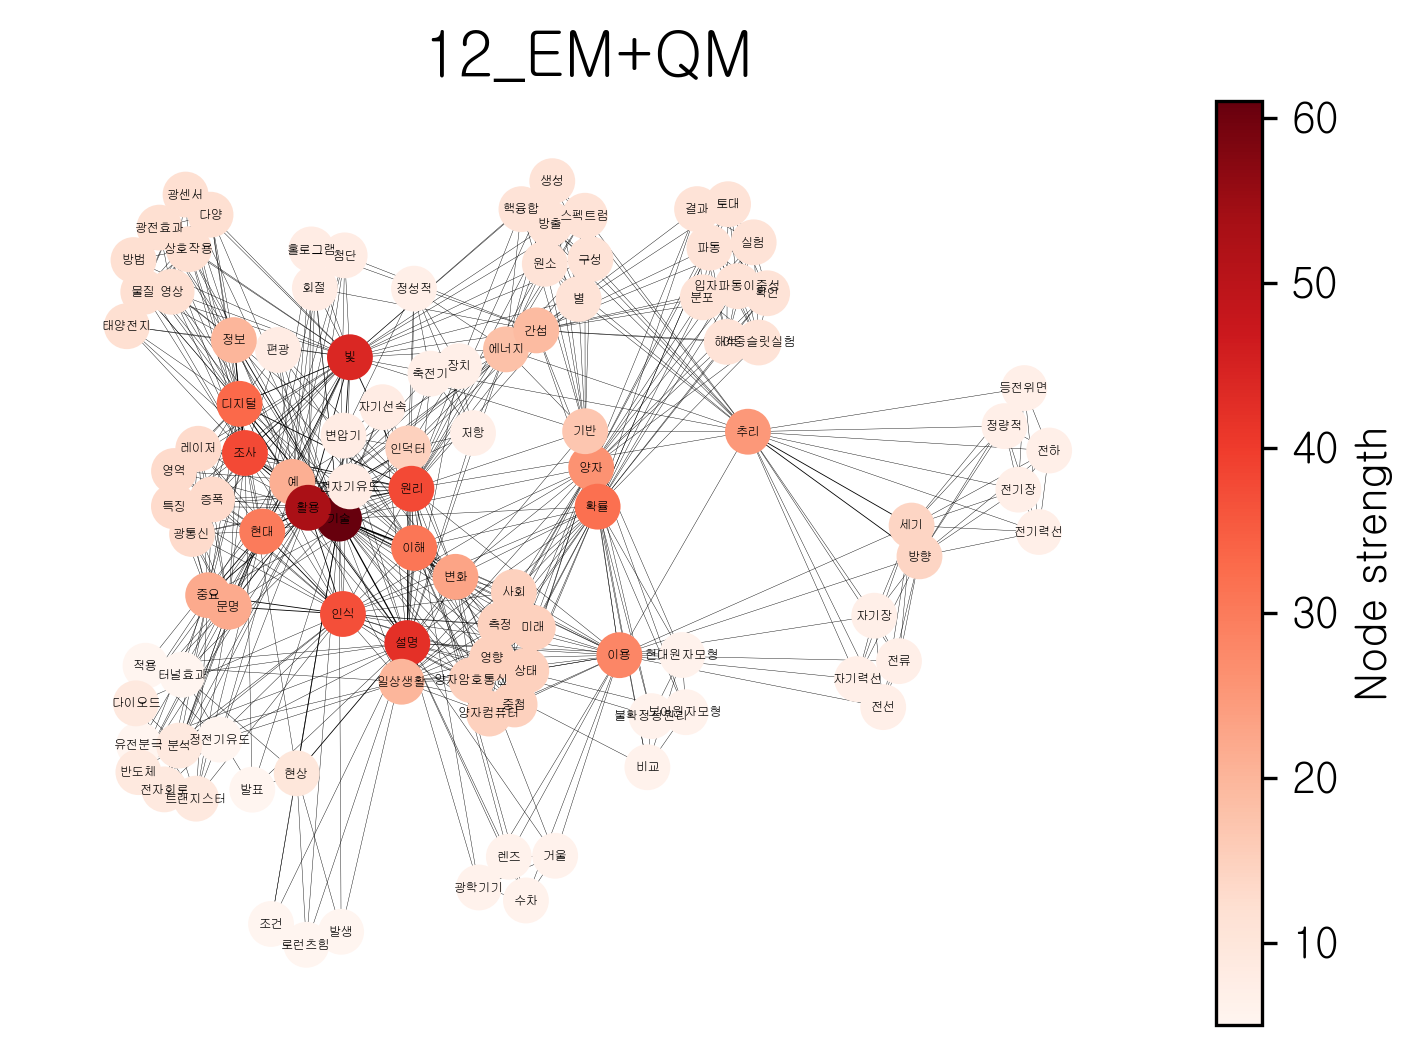

In [67]:
subject_graph(2, file_lst[5], '12_EM+QM')

In [68]:
G = graph(2, file_lst[5])

In [69]:
hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight = basic_info(G)

Number of nodes: 105
Number of edges: 695
WordFreq avg: 1.52, WordFreq std: 1.16
Degree avg: 13.24, Degree std: 8.41
NodeWeight avg: 14.19, NodeWeight std: 10.48
EdgeWeight avg: 1.07, EdgeWeight std: 0.29


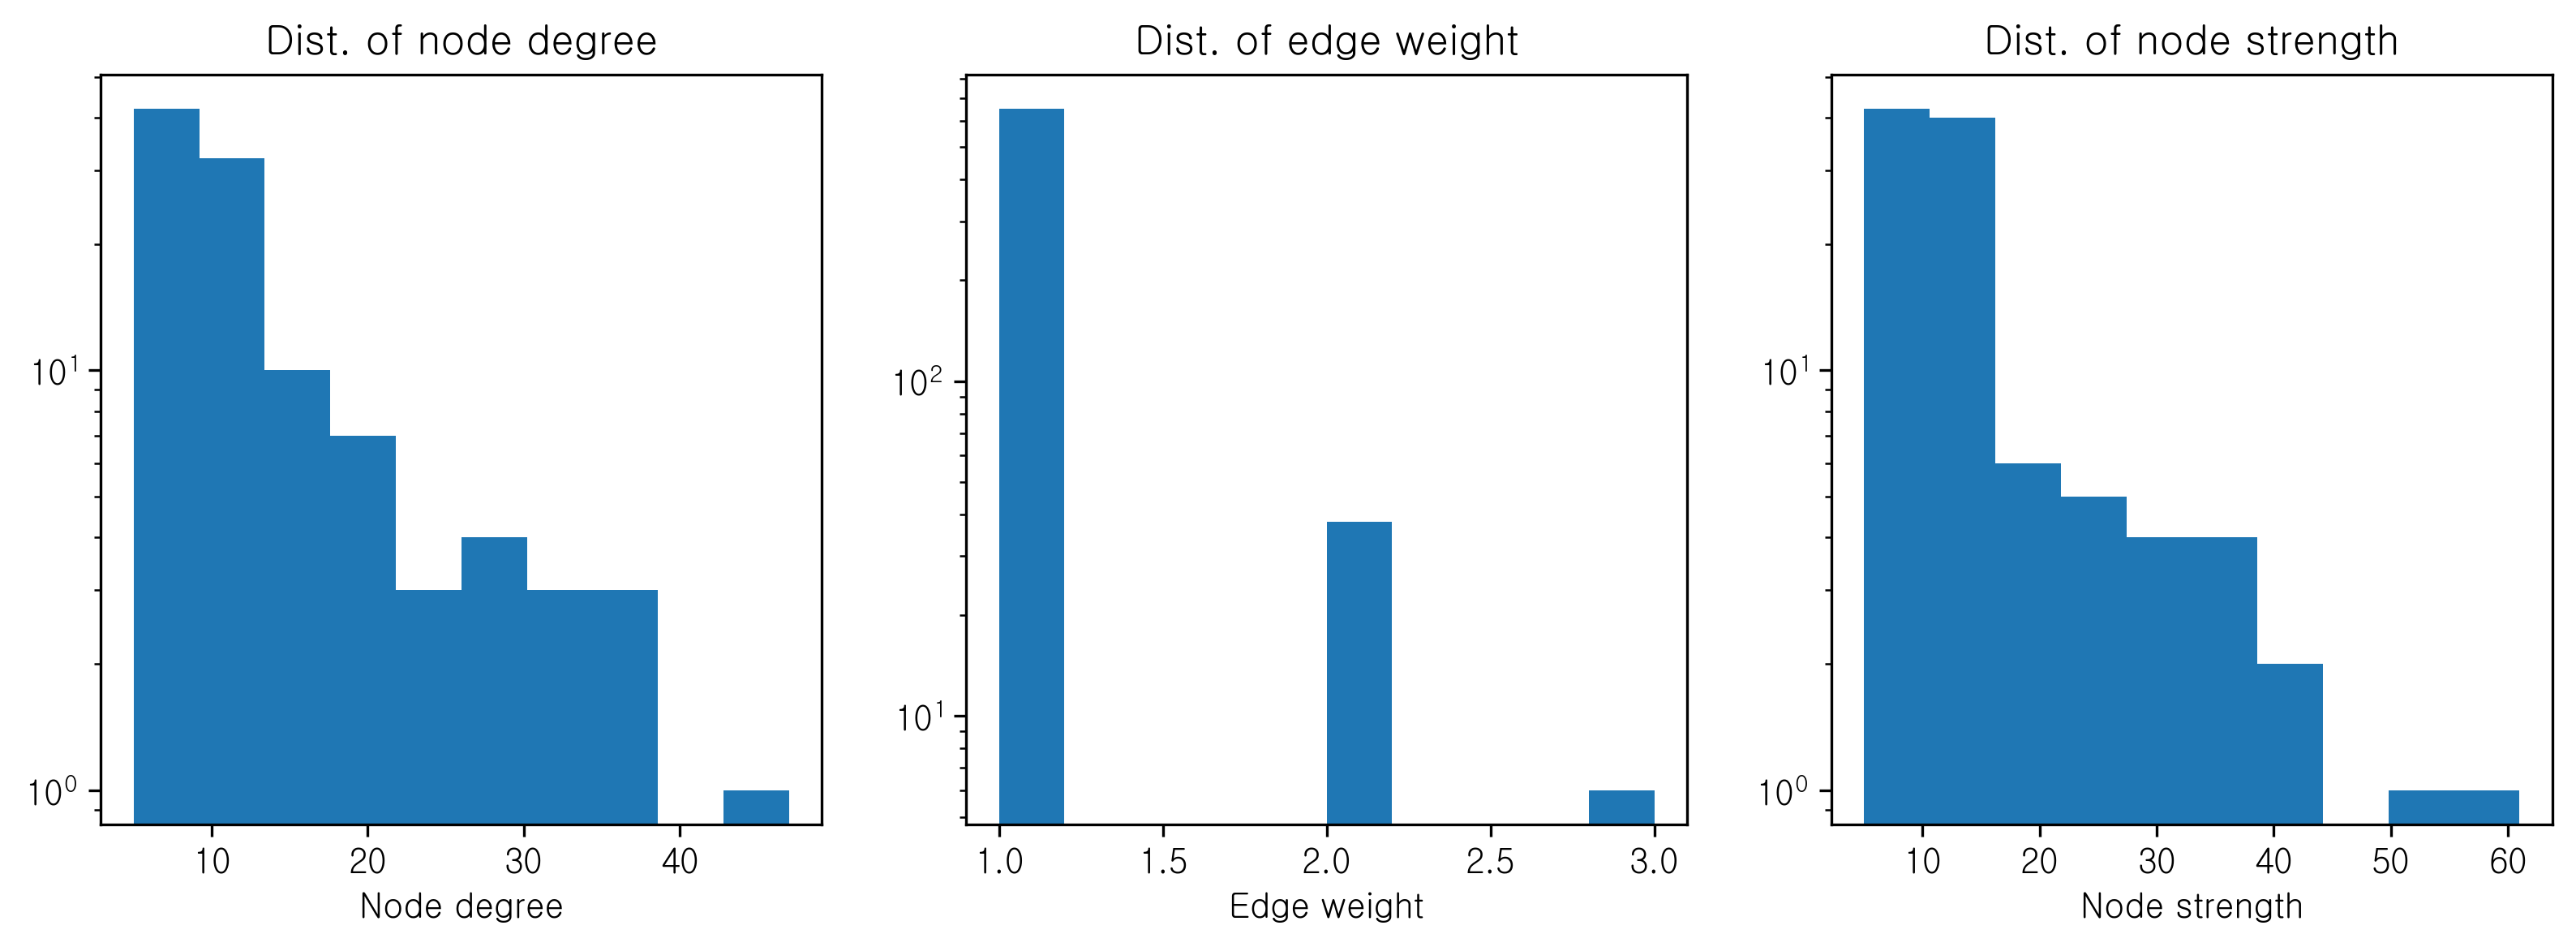

In [70]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


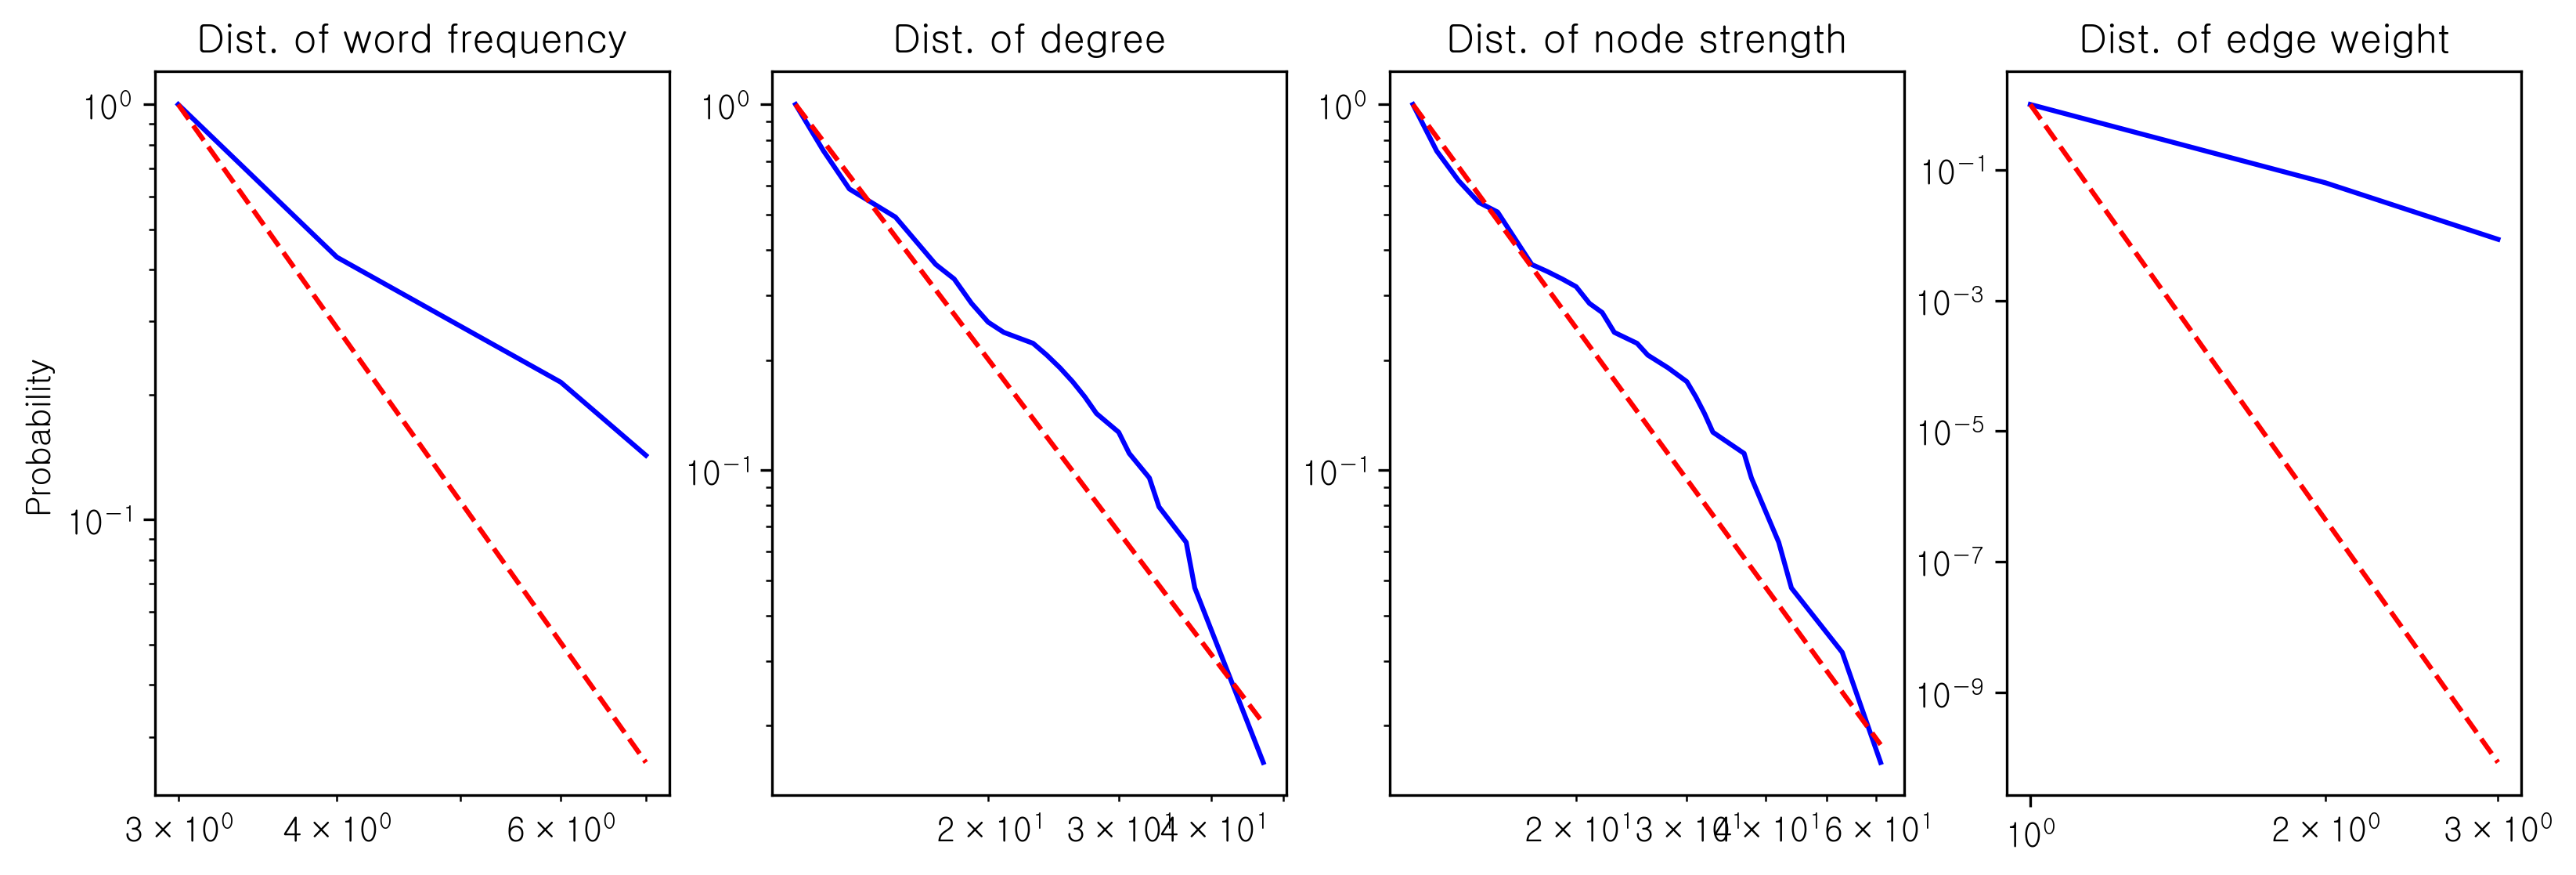

In [71]:
power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

In [72]:
df = info(G)
df.head(20)

Node_F  Node Frequency Node_ND  Node Degree Node_NS  Node Strength  \
0      설명             7.0      기술         47.0      기술           61.0   
1      기술             7.0      활용         38.0      활용           53.0   
2      활용             6.0       빛         38.0       빛           44.0   
3       빛             4.0      설명         37.0      설명           42.0   
4      원리             4.0      원리         34.0      원리           38.0   
5      조사             4.0      인식         33.0      조사           38.0   
6      추리             3.0      확률         31.0      인식           37.0   
7       예             3.0      조사         30.0     디지털           33.0   
8      이용             3.0      이용         28.0      확률           32.0   
9      이해             3.0      이해         27.0      이해           31.0   
10     인식             3.0     디지털         26.0      현대           30.0   
11     현대             3.0      양자         25.0      이용           28.0   
12    디지털             3.0      현대         24.0      양자           26.0   
13     확률             3.0      추리         23.0      추리           25.0   
14     세기             2.0      변화         21.0      변화           23.0   
15     방향             2.0    일상생활         20.0      문명           22.0   
16   일상생활             2.0       예         19.0      중요           22.0   
17     현상             2.0      간섭         19.0       예           21.0   
18     변화             2.0     에너지         18.0    일상생활           20.0   
19    인덕터             2.0      문명         18.0      정보           20.0   

         Edge  Edge Weight Node_BC  Betweenness Centrality  
0    (설명, 기술)            3      기술                0.202466  
1    (기술, 이해)            3      설명                0.190485  
2    (기술, 활용)            3      이용                0.164825  
3    (기술, 조사)            3       빛                0.157158  
4    (활용, 현대)            3      활용                0.153970  
5   (조사, 디지털)            3      추리                0.149024  
6    (세기, 추리)            2      원리                0.146557  
7    (세기, 방향)            2      확률                0.133925  
8    (추리, 방향)            2      인식                0.111917  
9    (설명, 현상)            2      조사                0.095564  
10   (설명, 활용)            2      양자                0.089157  
11  (설명, 인덕터)            2      이해                0.082726  
12    (예, 기술)            2      간섭                0.079626  
13    (예, 활용)            2      기반                0.075782  
14   (기술, 현상)            2     에너지                0.072094  
15   (기술, 변화)            2     디지털                0.072008  
16    (기술, 빛)            2      현대                0.068813  
17  (기술, 디지털)            2       예                0.064951  
18   (기술, 정보)            2    일상생활                0.056527  
19   (이해, 활용)            2      변화                0.056186